In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import time
import seaborn as sns
rcParams['figure.figsize'] = 15, 6

In [2]:
data=pd.read_stata('20151128timeseries.dta')

In [6]:
data[['date']] = pd.to_datetime(data.date, format='%Y%m%d').dt.date


ValueError: time data datetime.date(2009, 9, 17) does not match format '%Y%m%d' (match)

In [7]:
data.head(5)

date ticker  impl_volatility_C  impl_volatility_P  \
date                                                                  
2009-09-17  2009-09-17     AA           0.592529           0.603772   
2009-10-22  2009-10-22     AA           0.341650           0.359711   
2009-11-19  2009-11-19     AA           0.449966           0.448173   
2009-12-17  2009-12-17     AA           0.476007           0.471412   
2010-01-21  2010-01-21     AA           0.411003           0.413214   

            impl_volatility_average  C_open_interest  P_open_interest  \
date                                                                    
2009-09-17                 0.598151            36909             8371   
2009-10-22                 0.350681            19085            10101   
2009-11-19                 0.449070            12330             8978   
2009-12-17                 0.473710           114470             7360   
2010-01-21                 0.412108             3262            11976   

            Total_open_interest  id       C       P  Next30daysVolatility  \
date                                                                        
2009-09-17                45280   1  920555  440018              0.024763   
2009-10-22                29186   1  739089  341054              0.032171   
2009-11-19                21308   1  894768  380696              0.029541   
2009-12-17               121830   1  881835  388055              0.037166   
2010-01-21                15238   1  378004  289835              0.025428   

            monthlychangeinVIX   date_var      total  
date                                                  
2009-09-17           23.650000 2009-09-17  1360573.0  
2009-10-22           20.690001 2009-10-22  1080143.0  
2009-11-19           22.629999 2009-11-19  1275464.0  
2009-12-17           22.570000 2009-12-17  1269890.0  
2010-01-21           22.270000 2010-01-21   667839.0

In [4]:
data.index=data.date

F:\anaconda\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


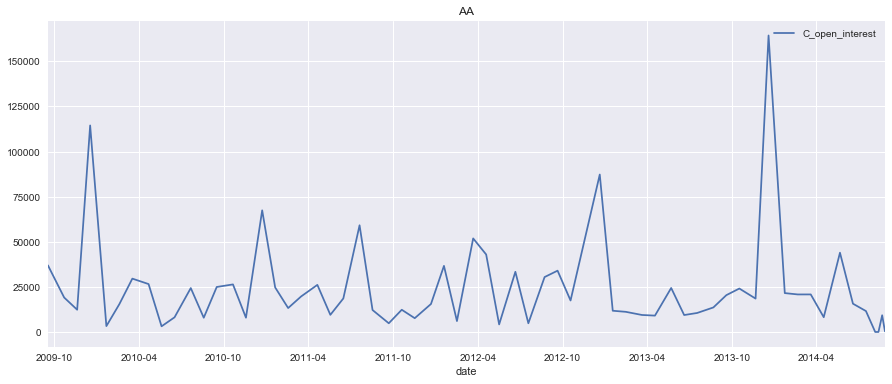

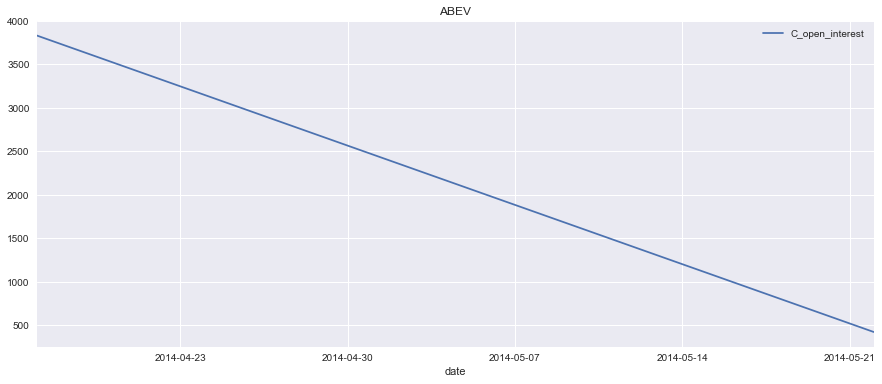

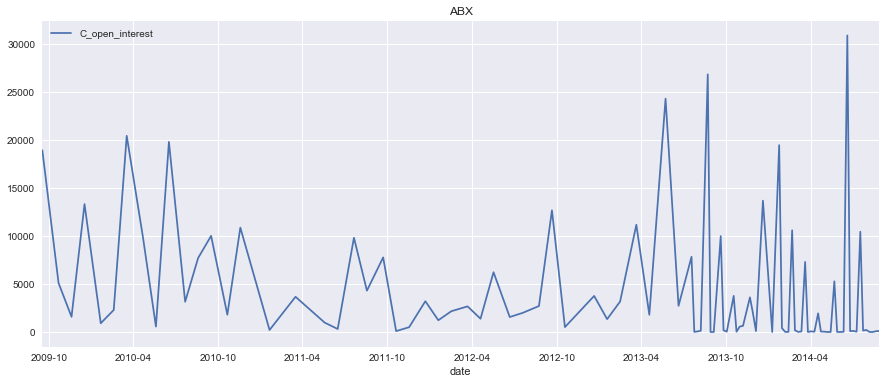

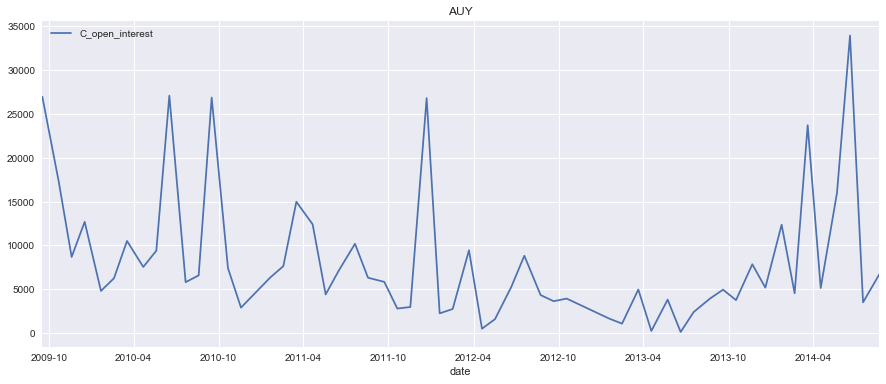

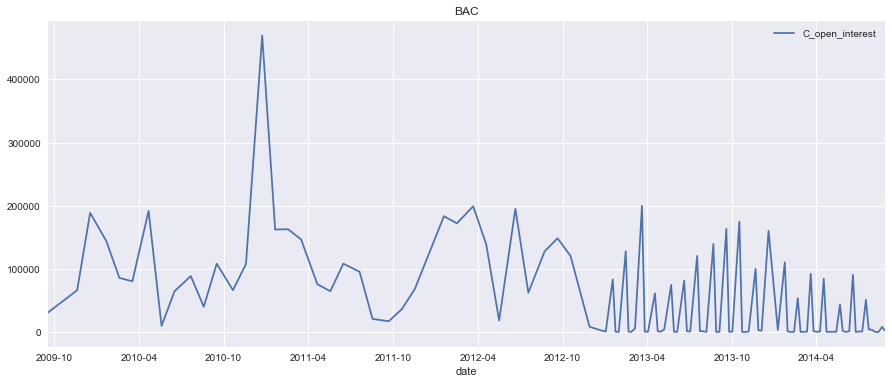

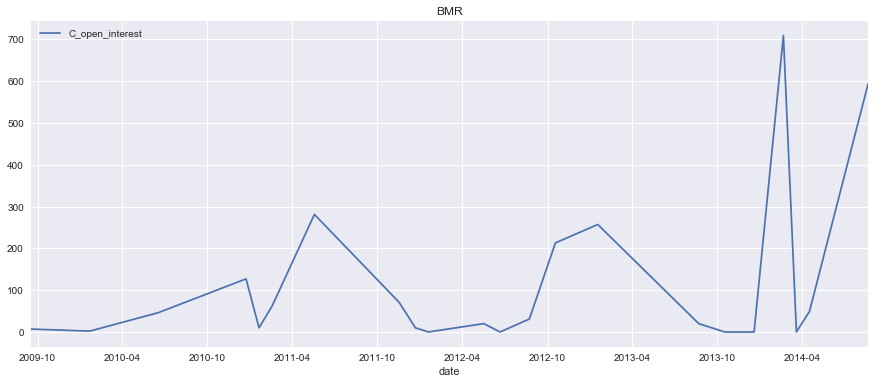

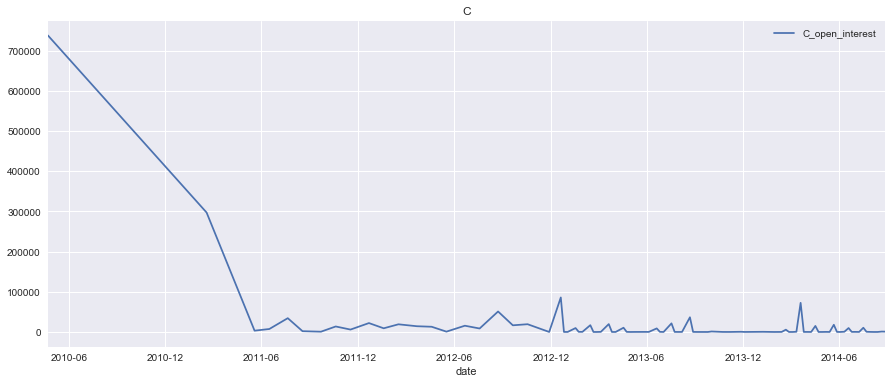

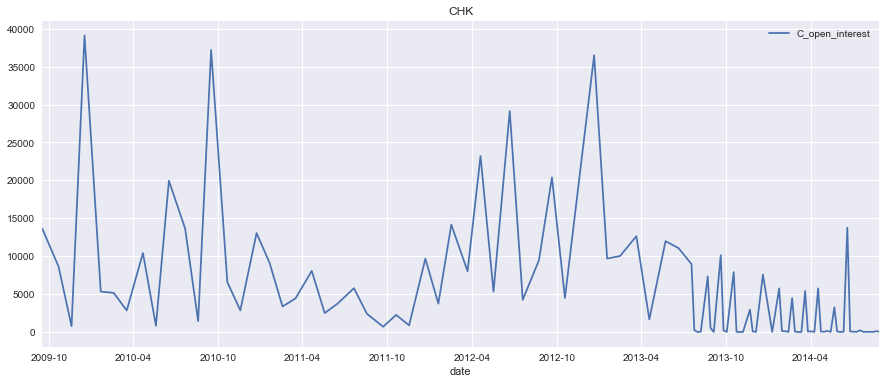

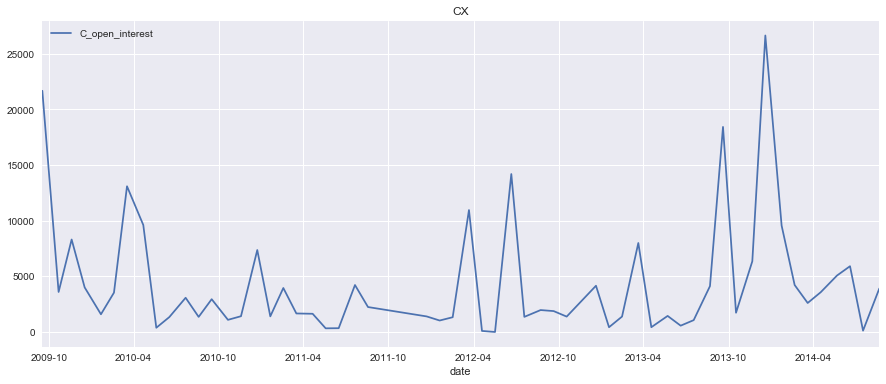

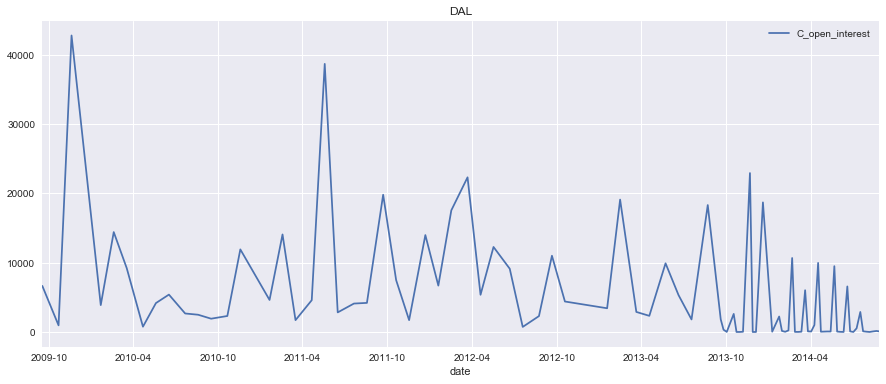

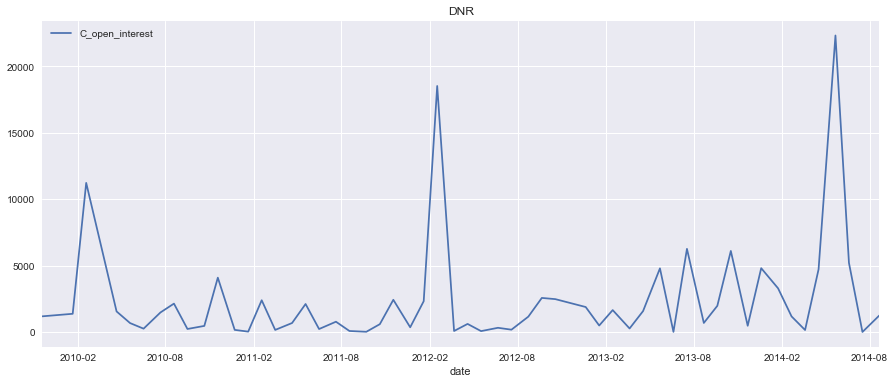

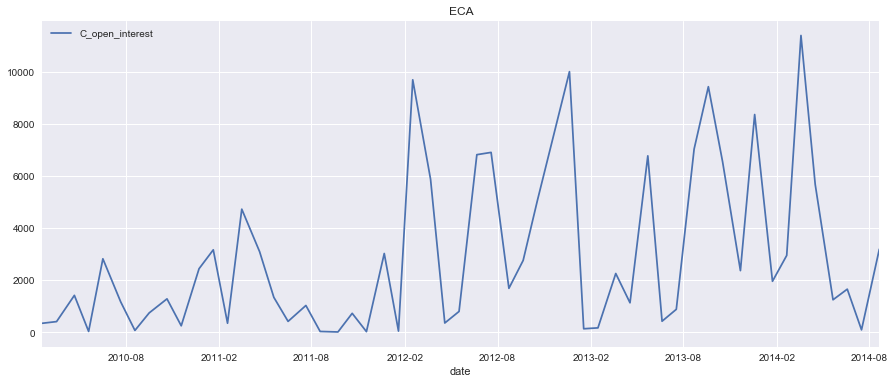

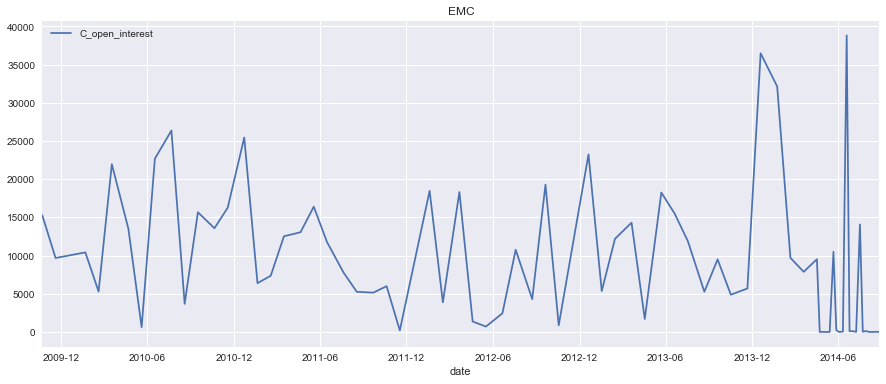

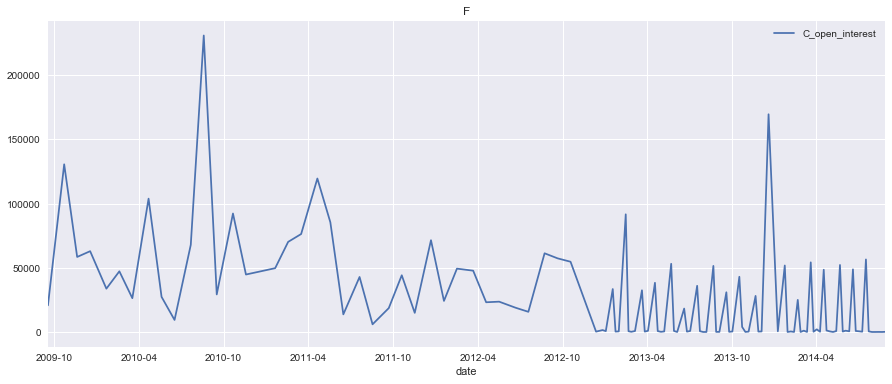

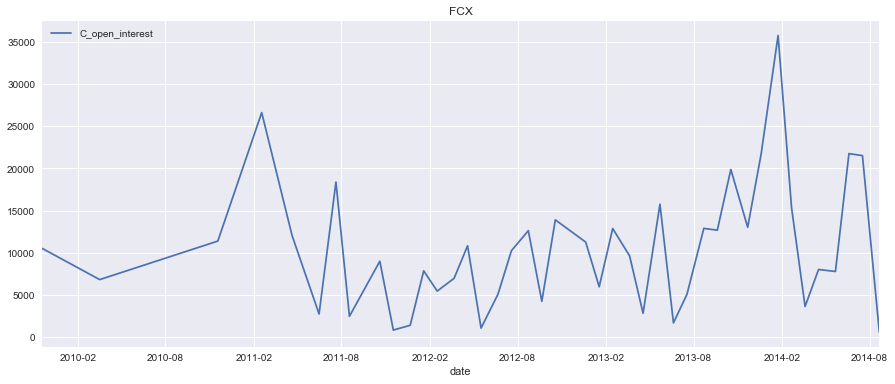

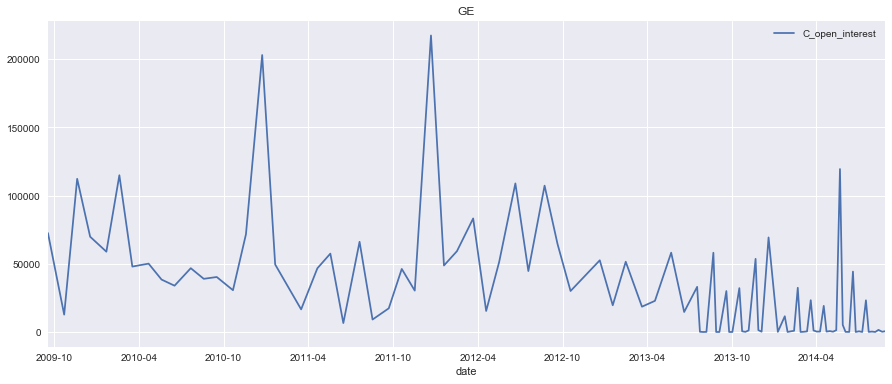

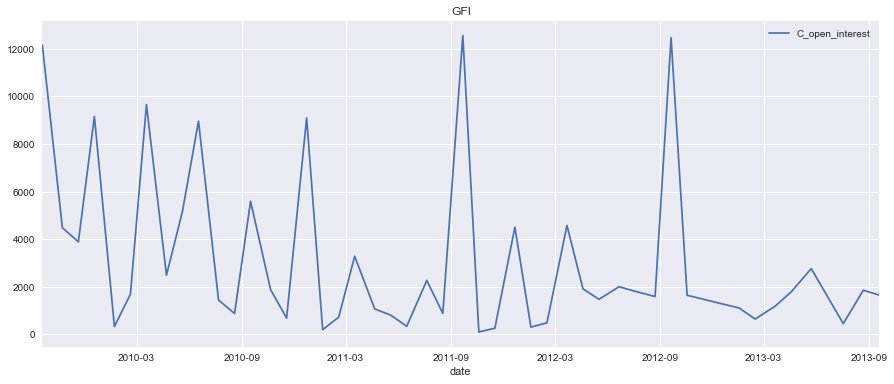

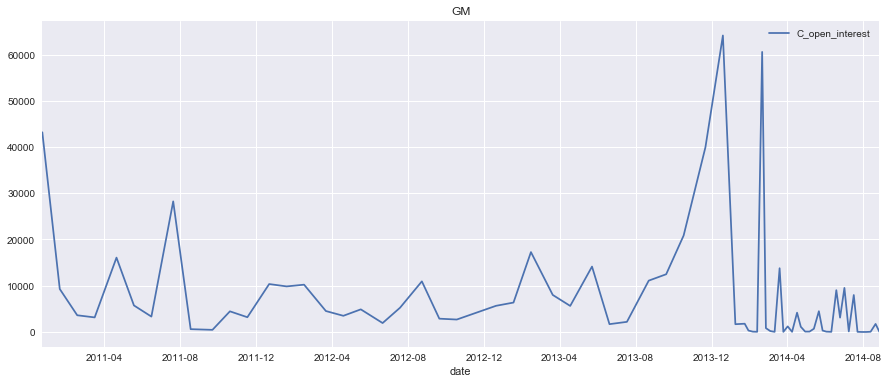

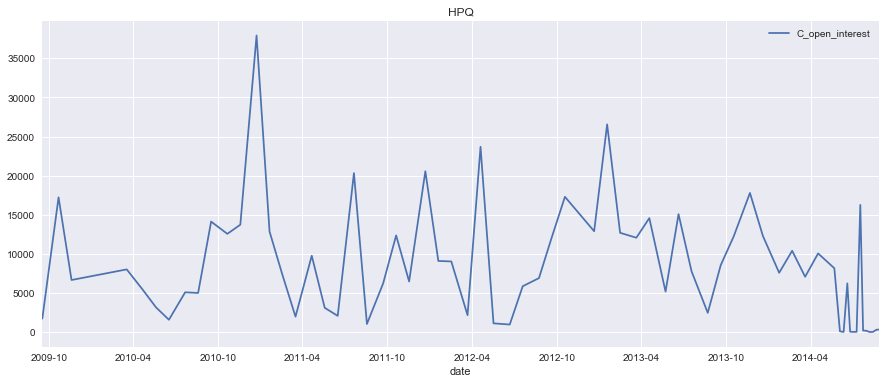

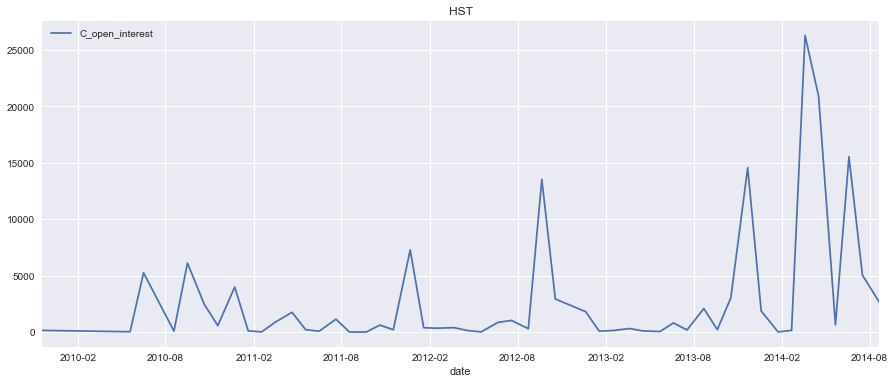

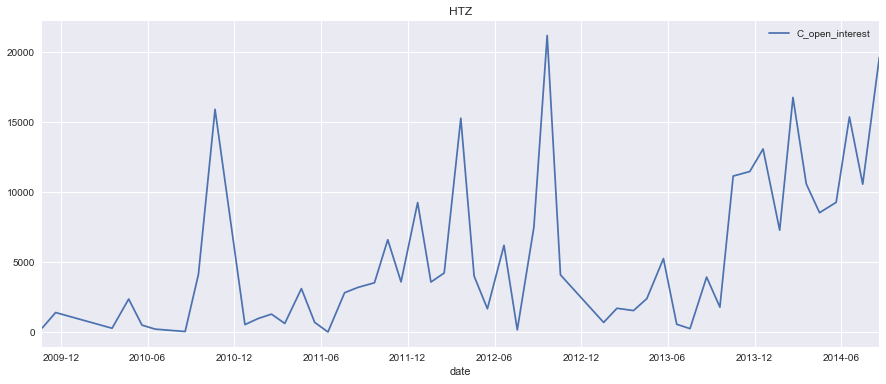

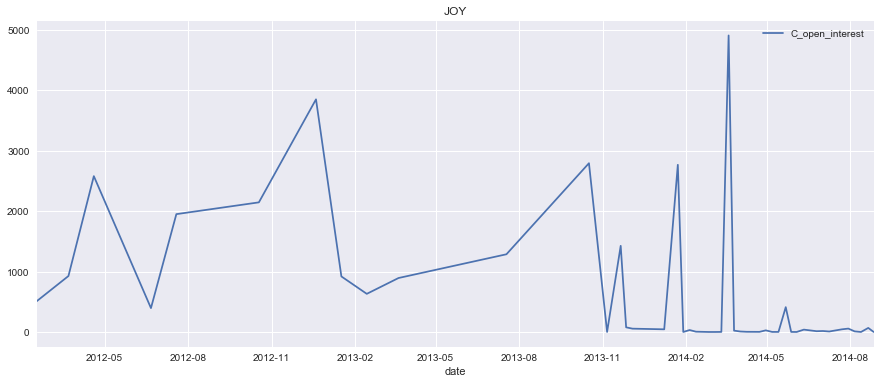

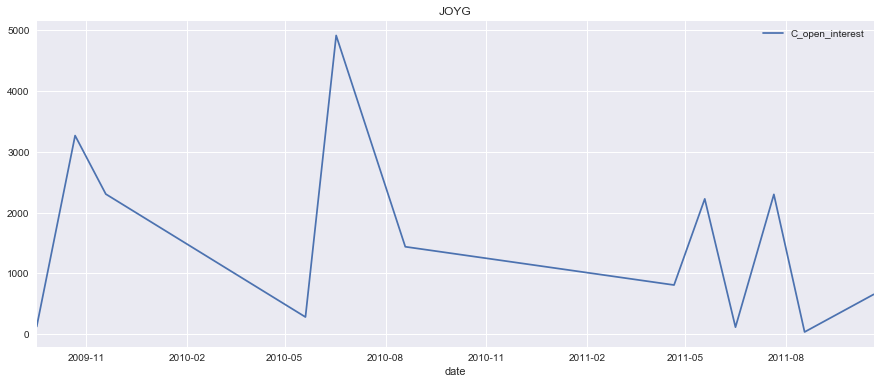

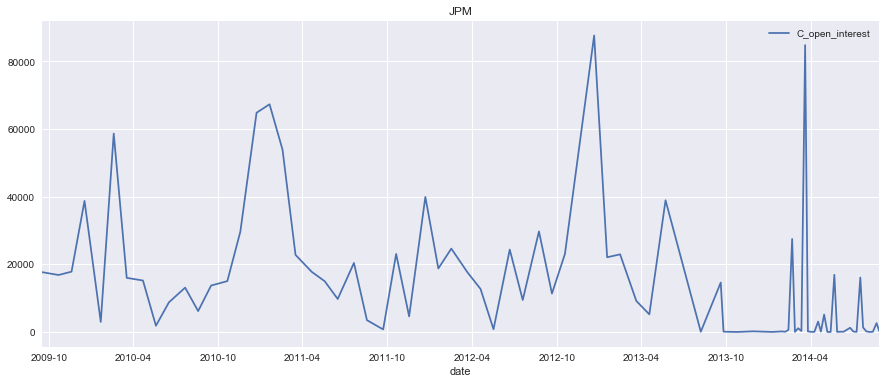

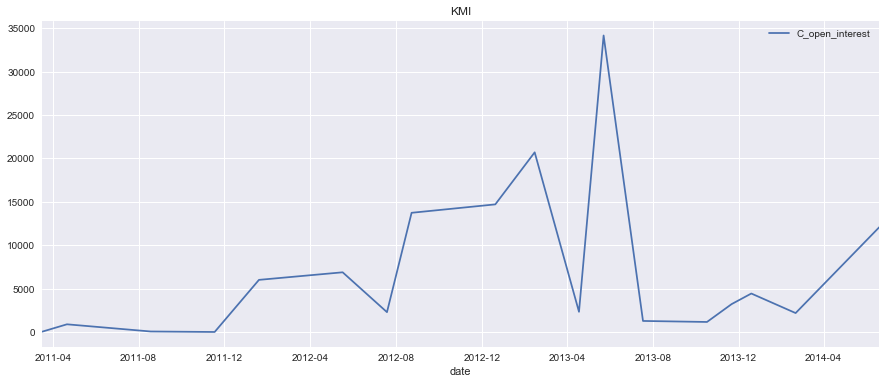

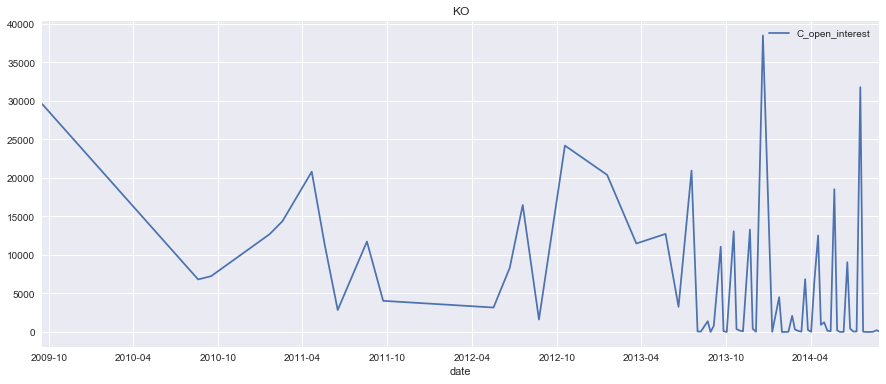

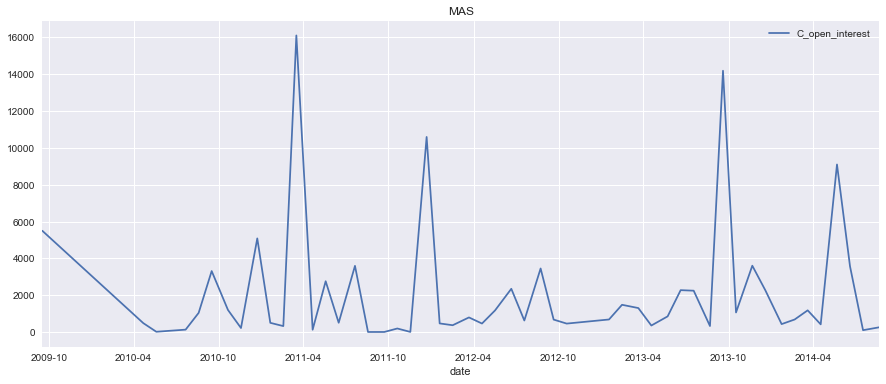

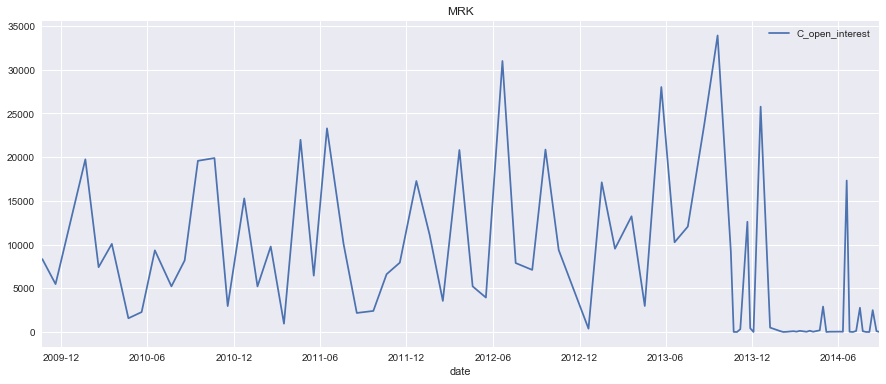

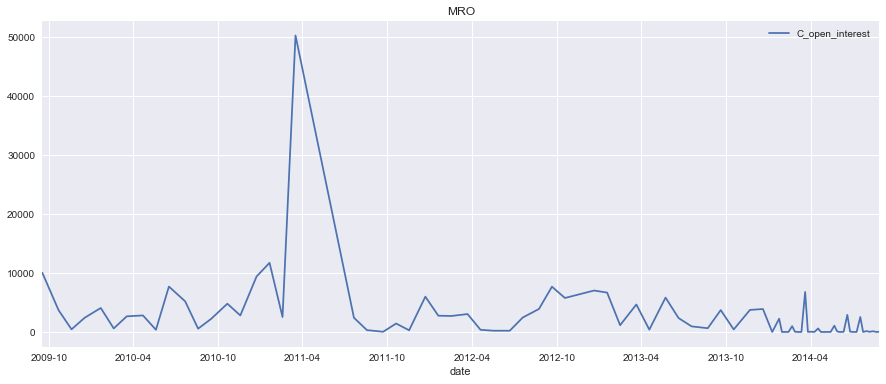

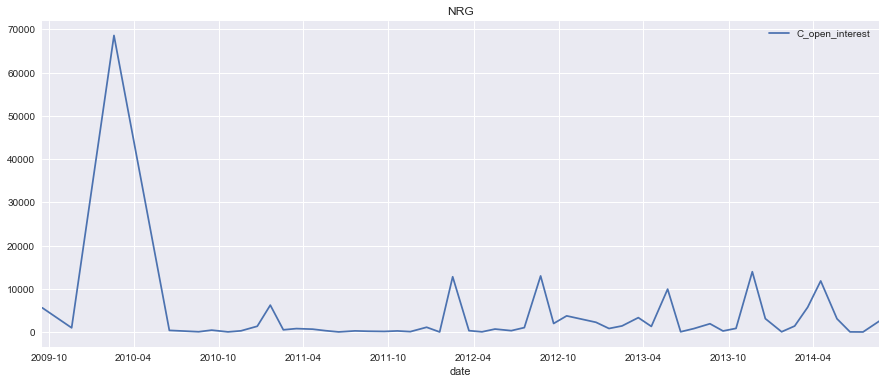

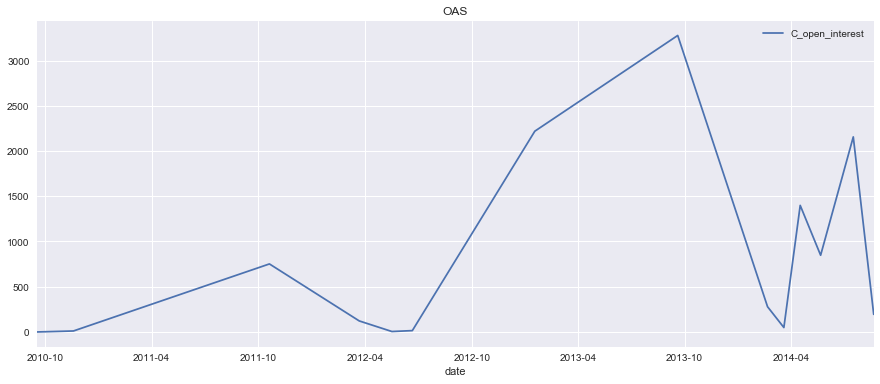

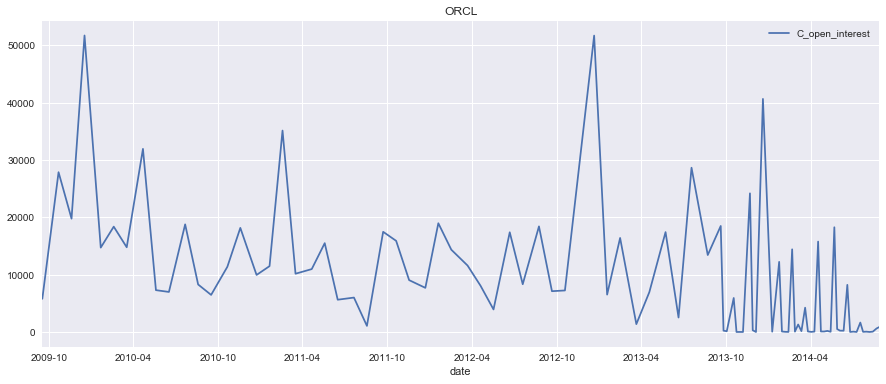

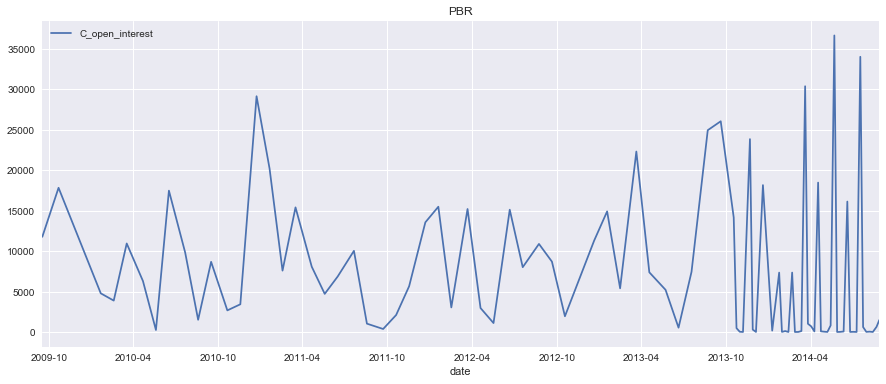

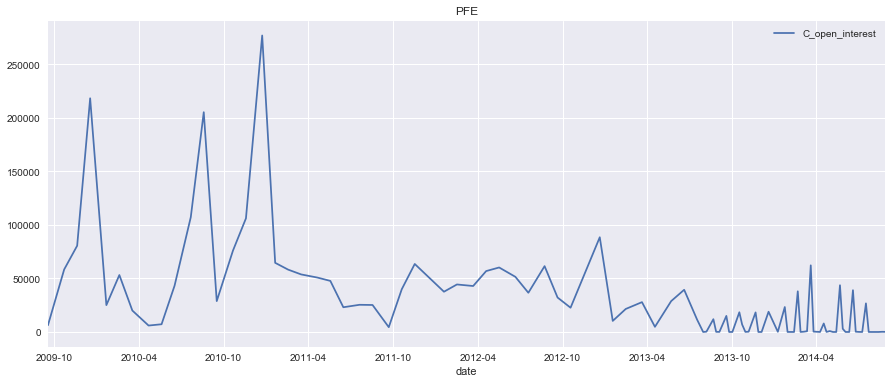

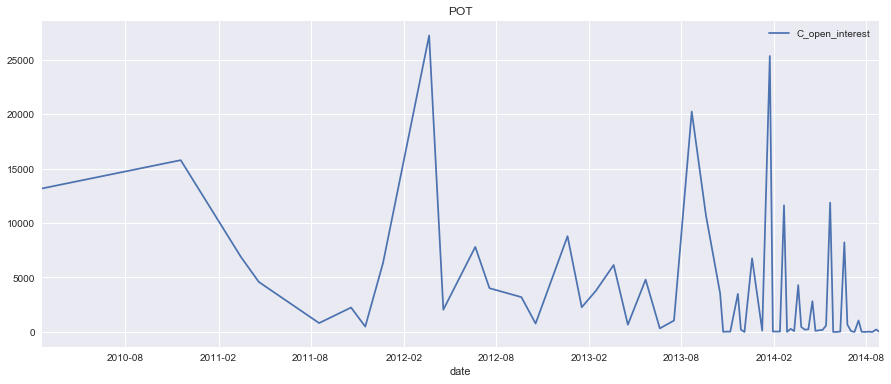

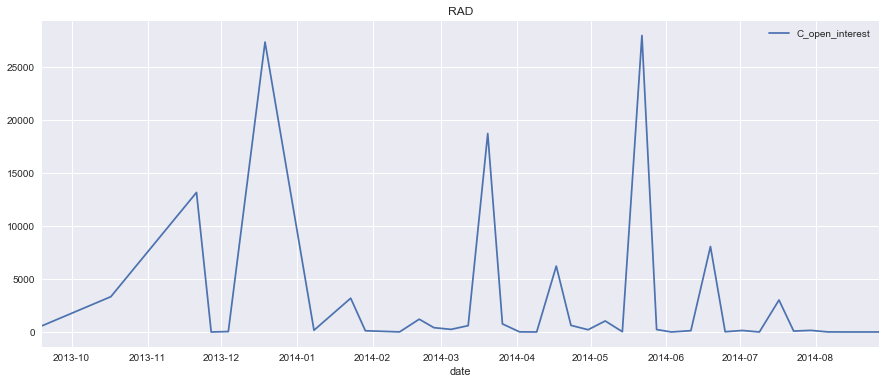

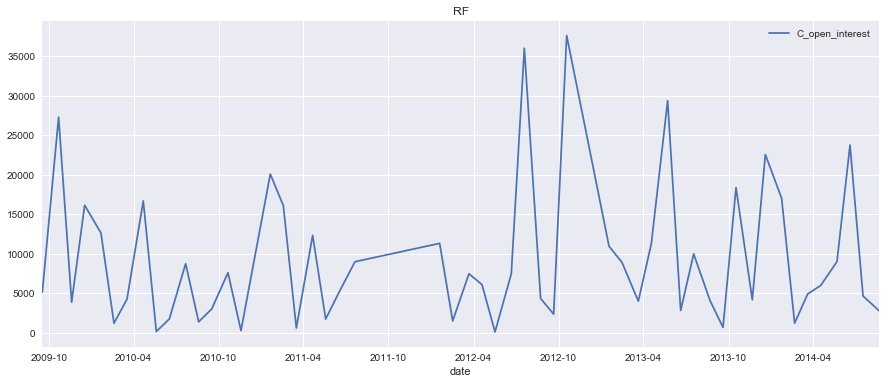

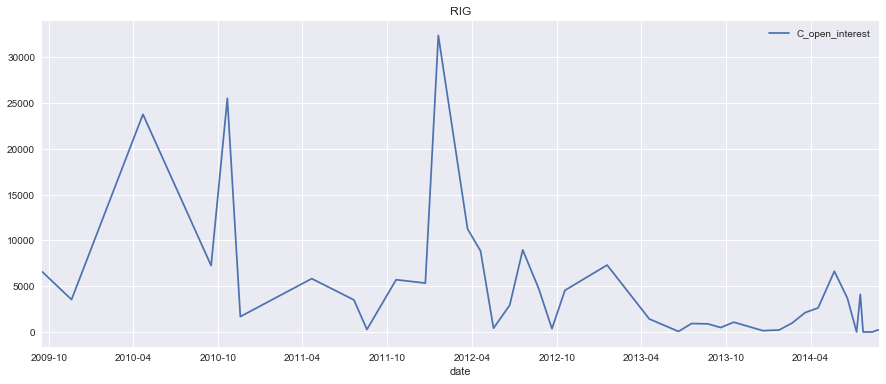

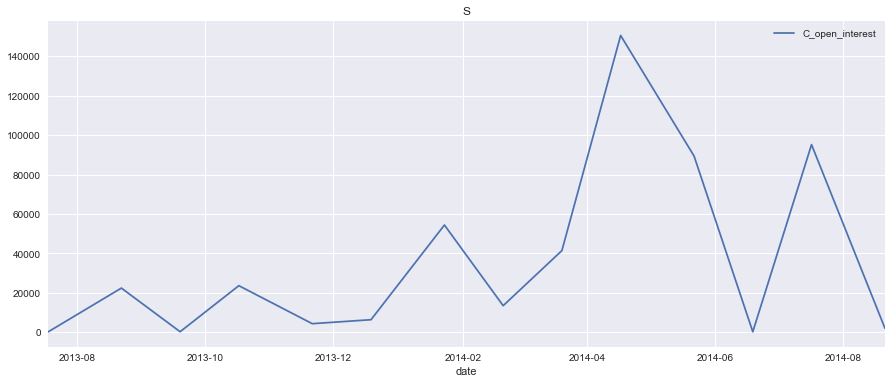

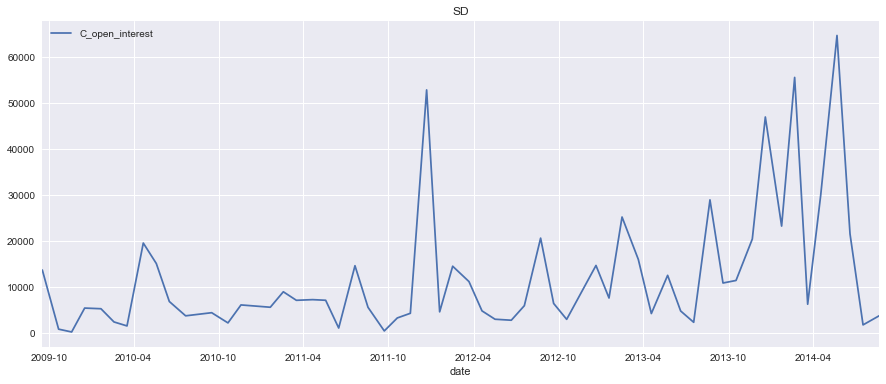

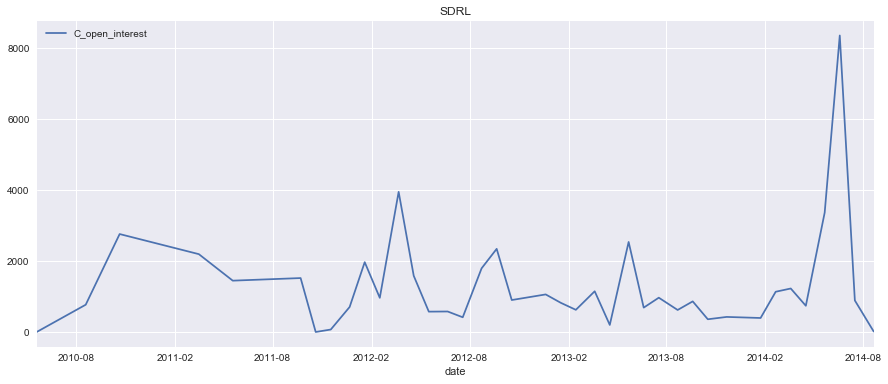

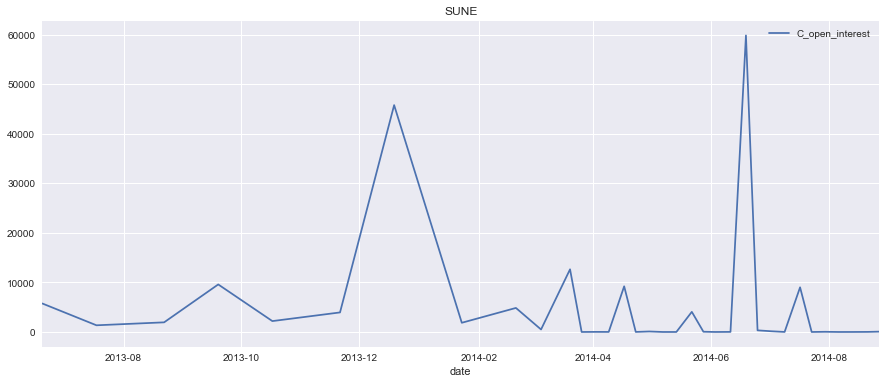

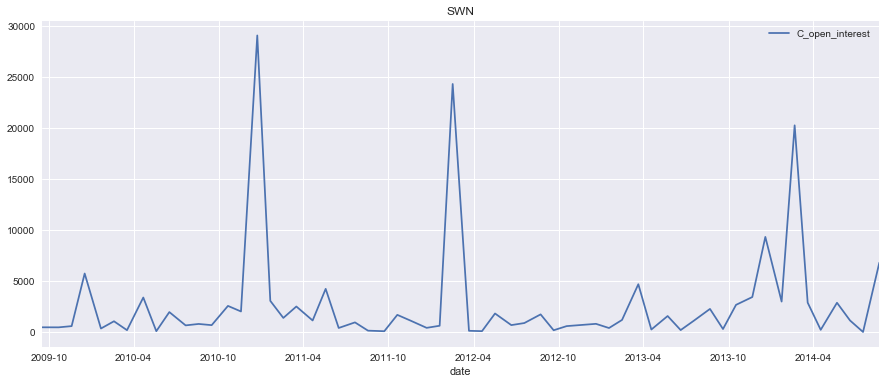

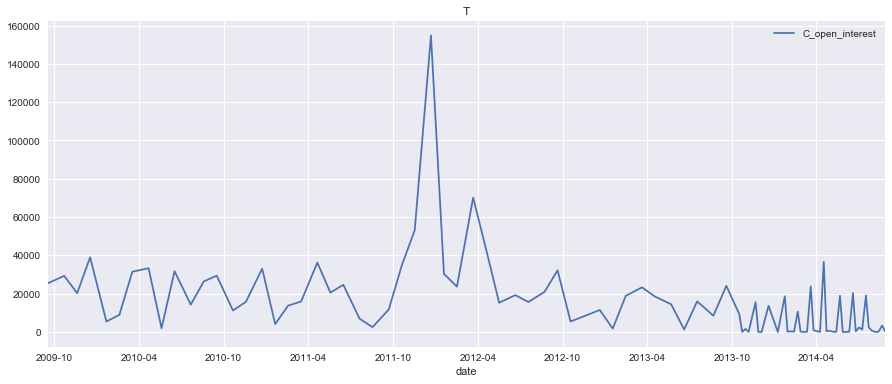

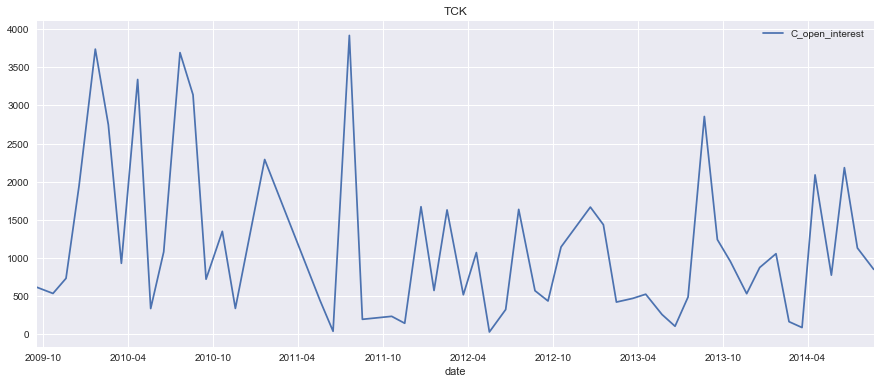

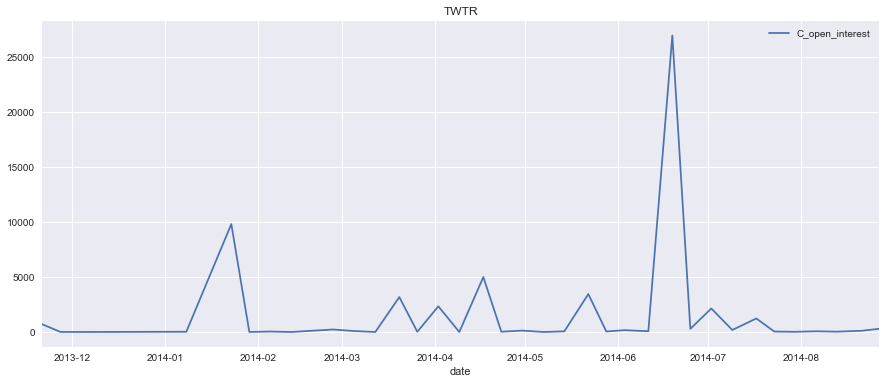

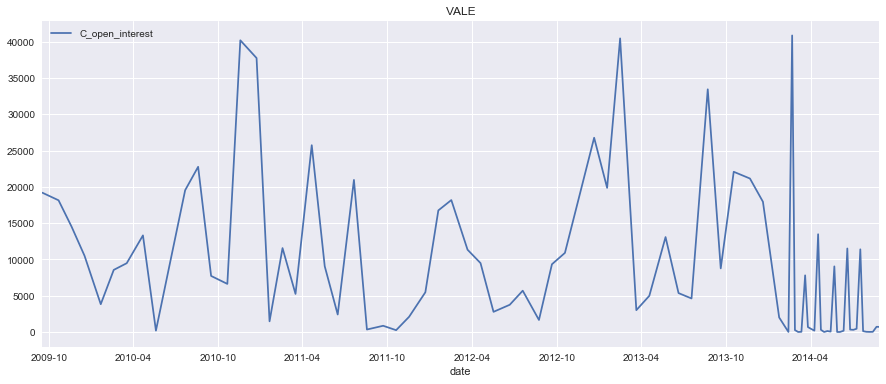

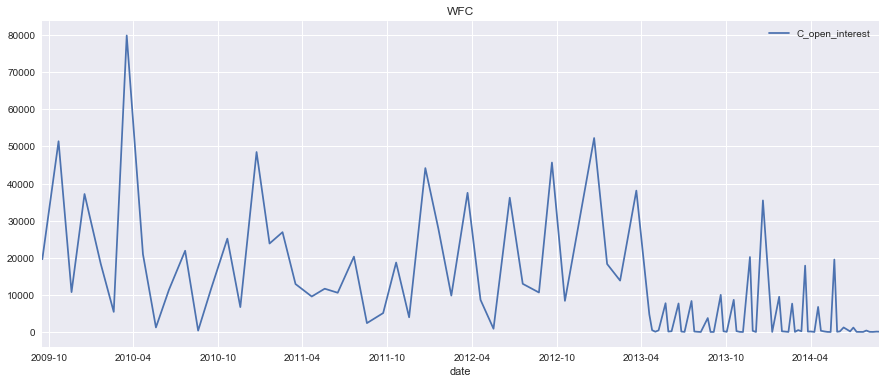

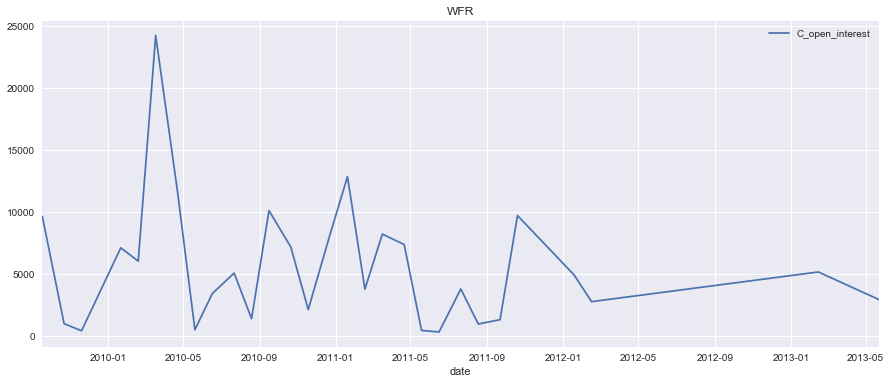

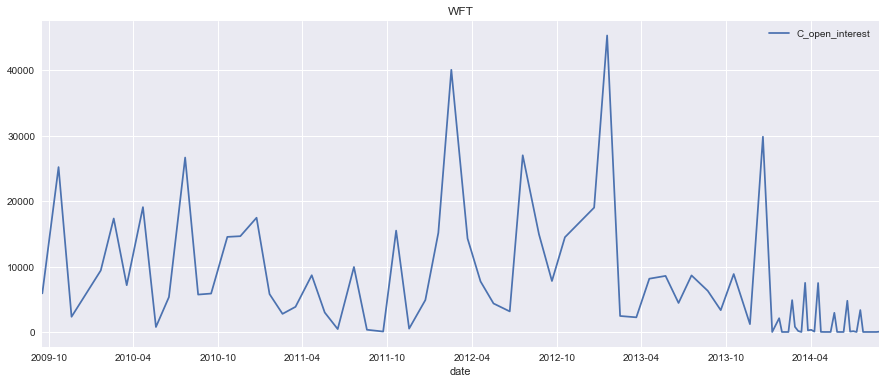

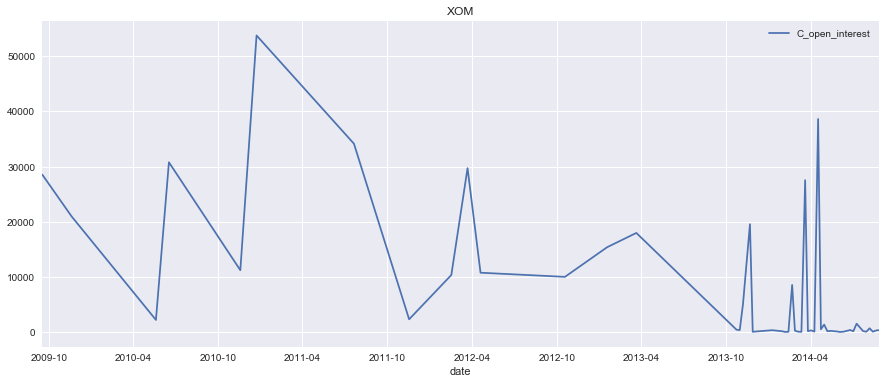

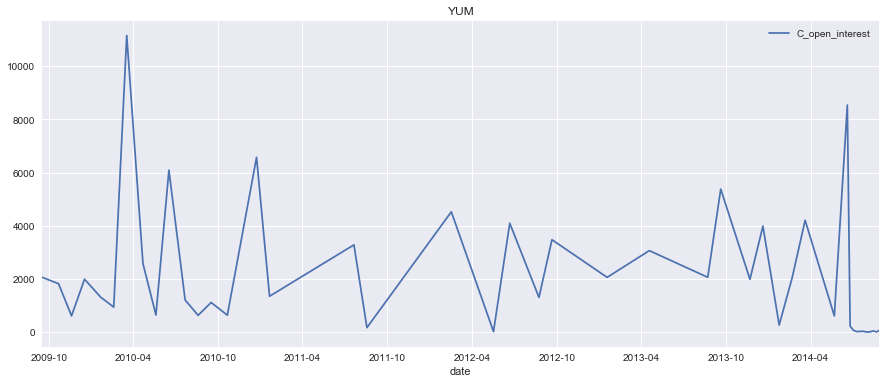

In [5]:
for name,group in data.groupby('ticker'):
    group.plot(x='date', y='C_open_interest', title=name)


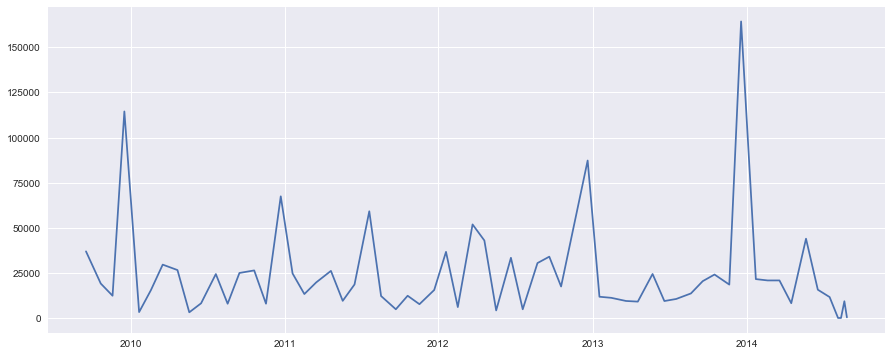

In [14]:
plt.plot(data.C_open_interest[data.ticker=='AA'])
plt.savefig('Time Trend for Stock Option Open Interest.png')


F:\anaconda\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


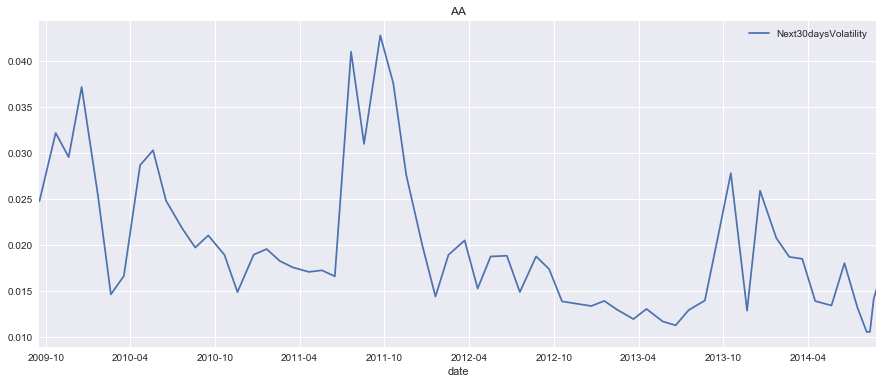

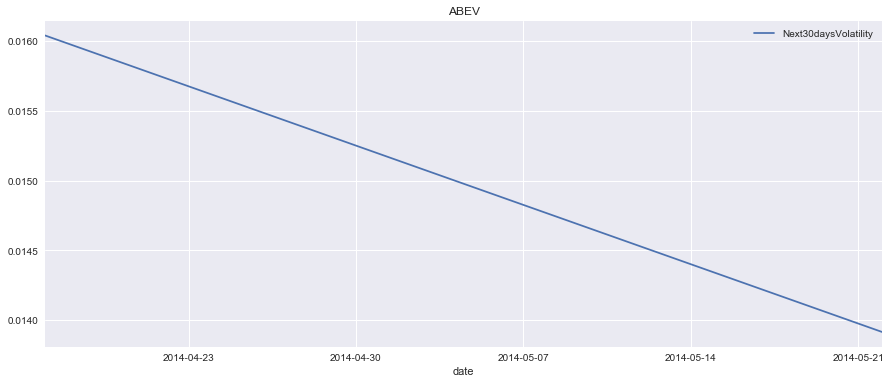

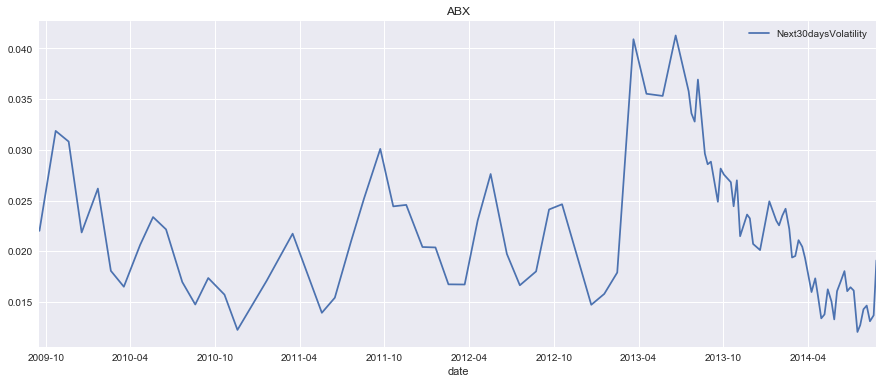

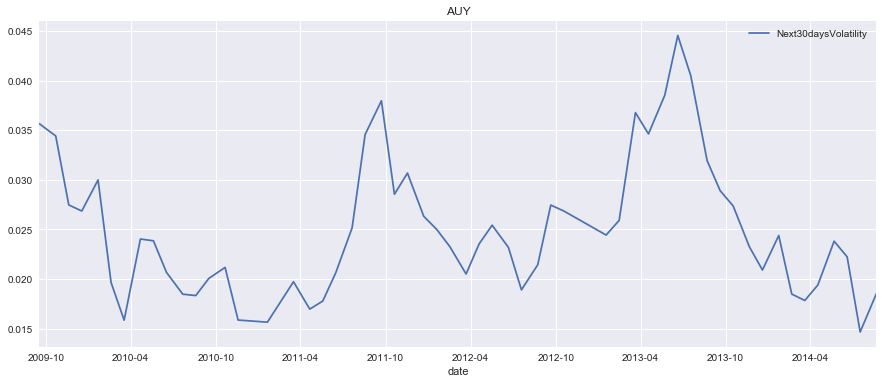

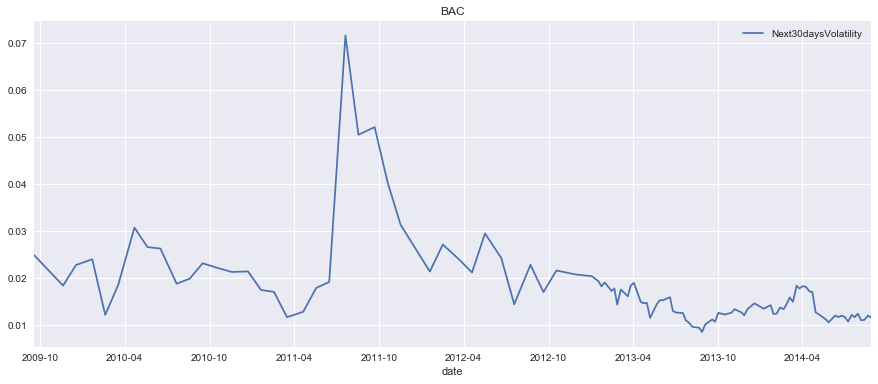

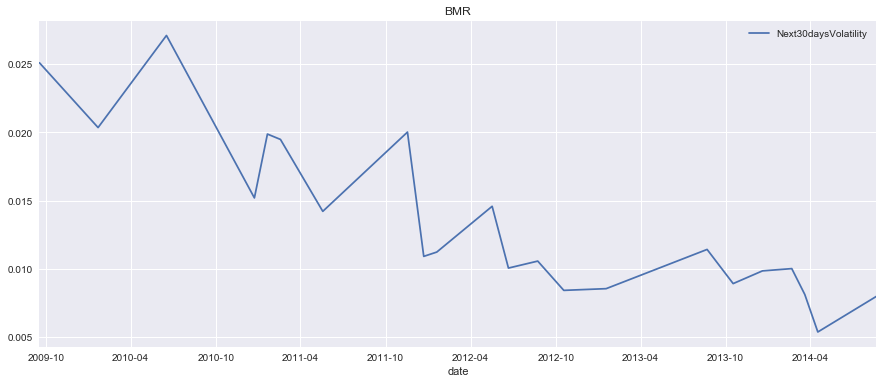

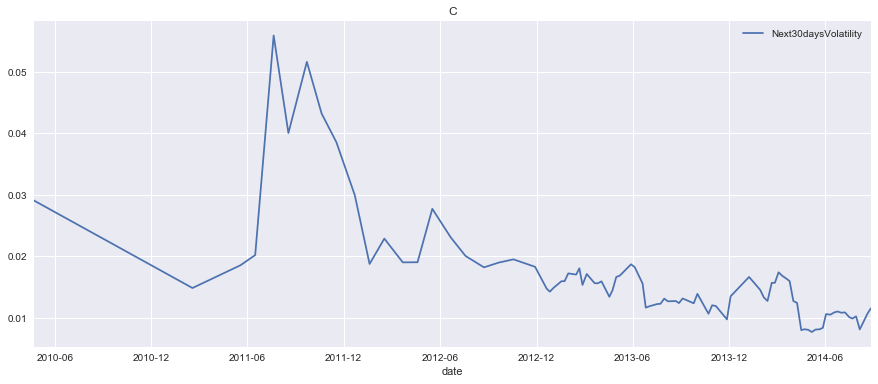

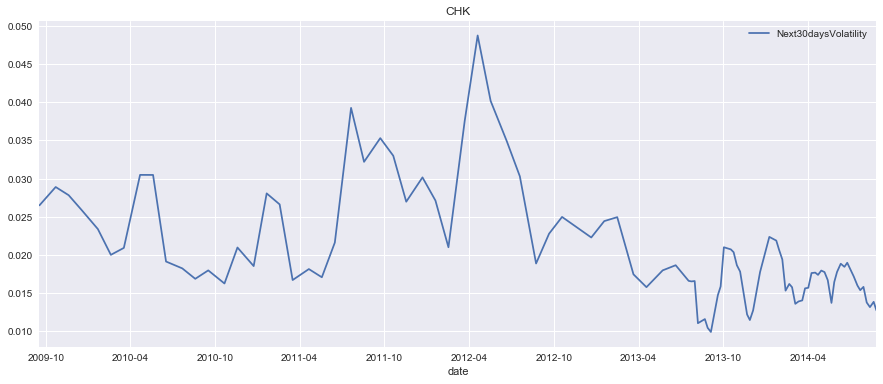

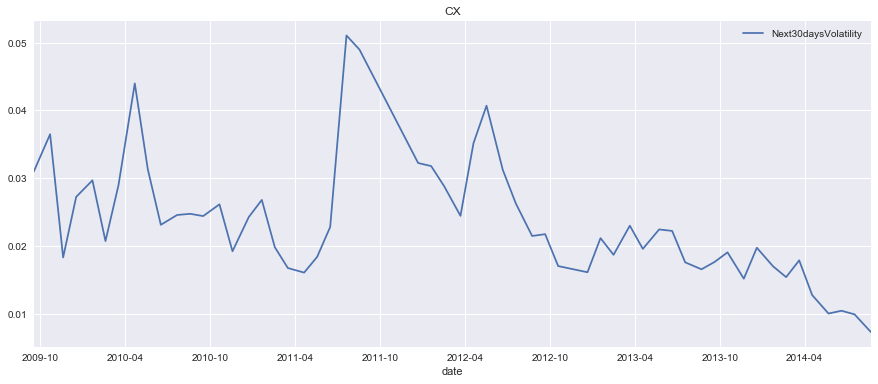

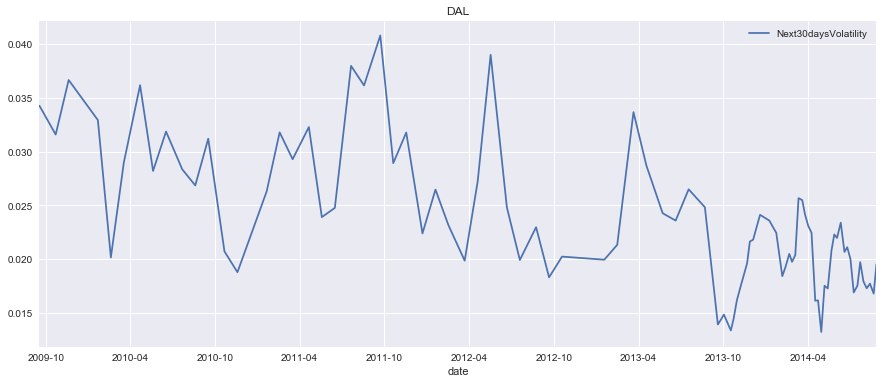

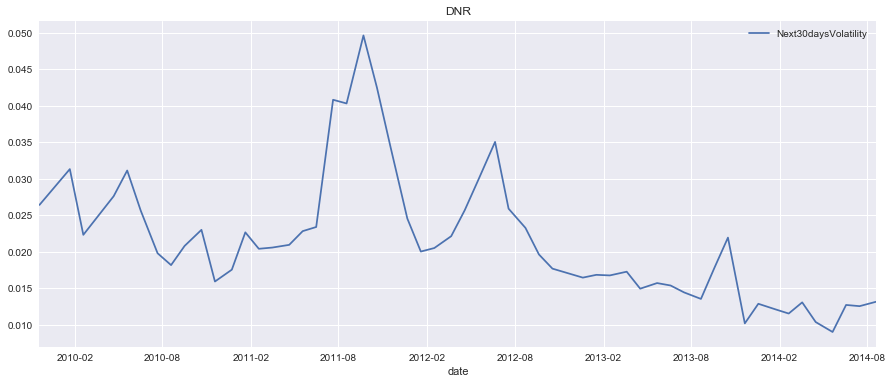

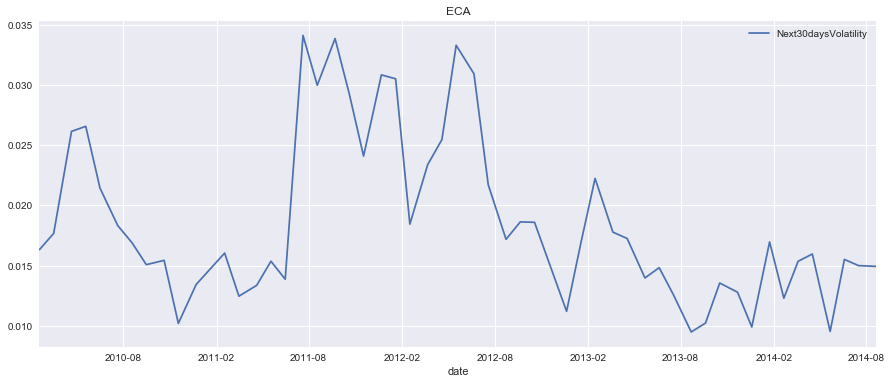

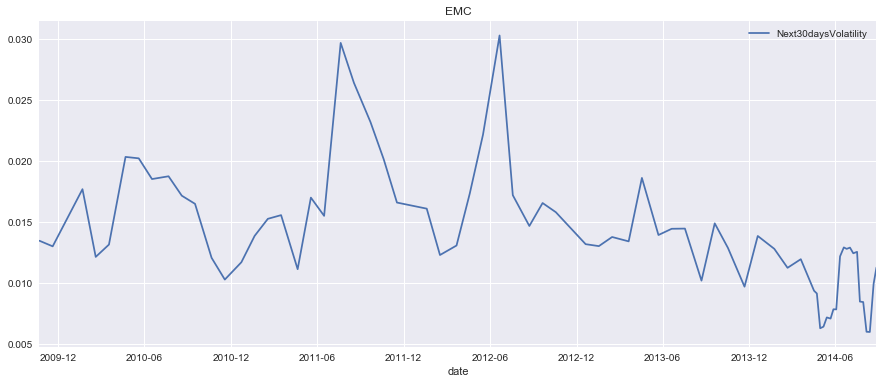

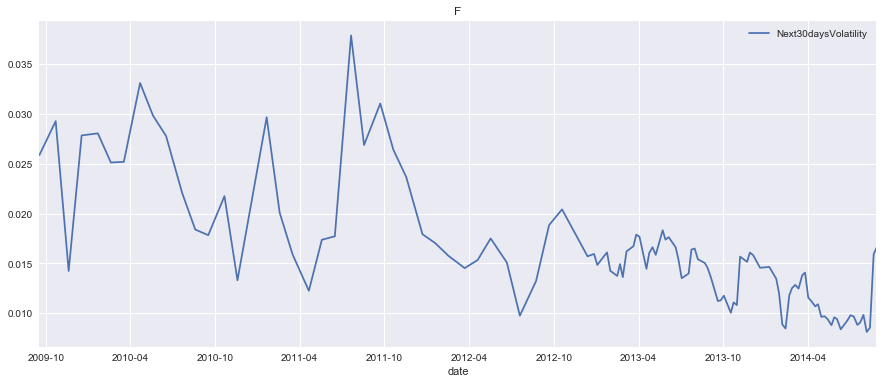

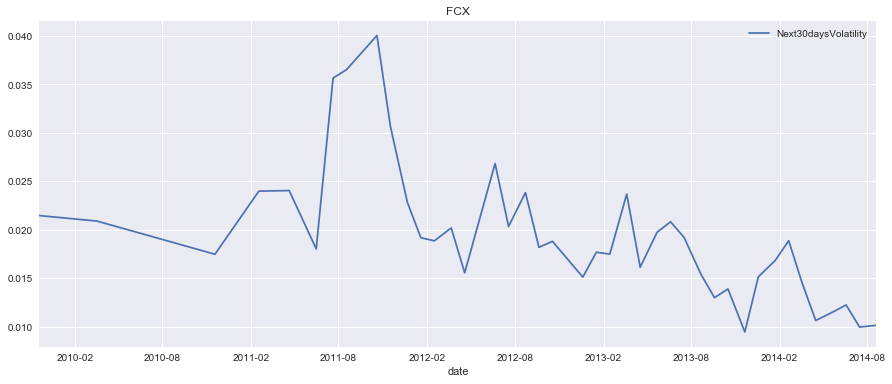

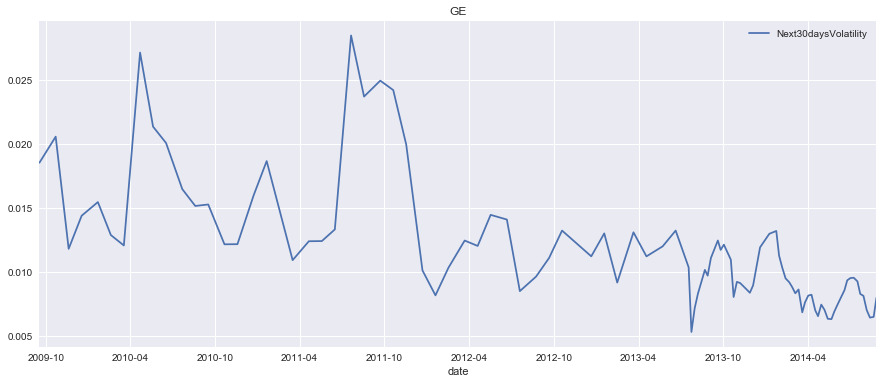

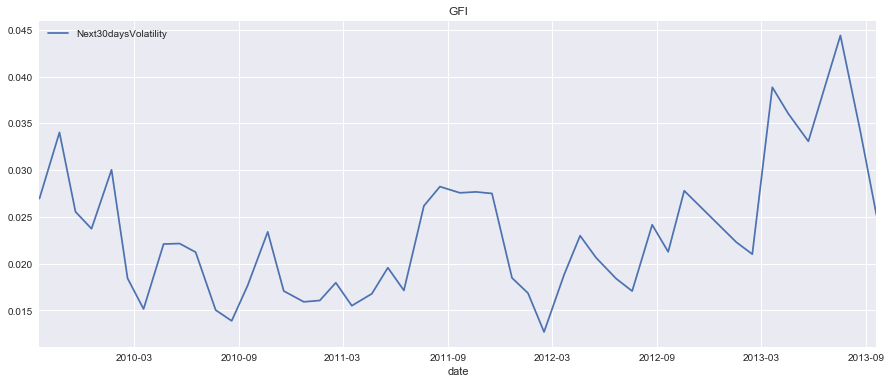

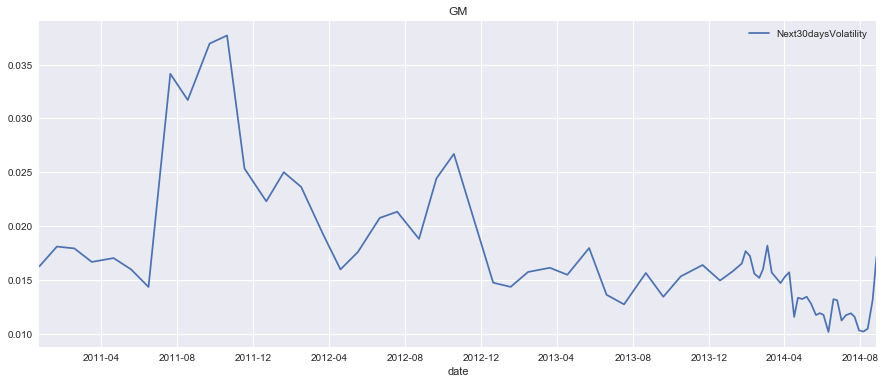

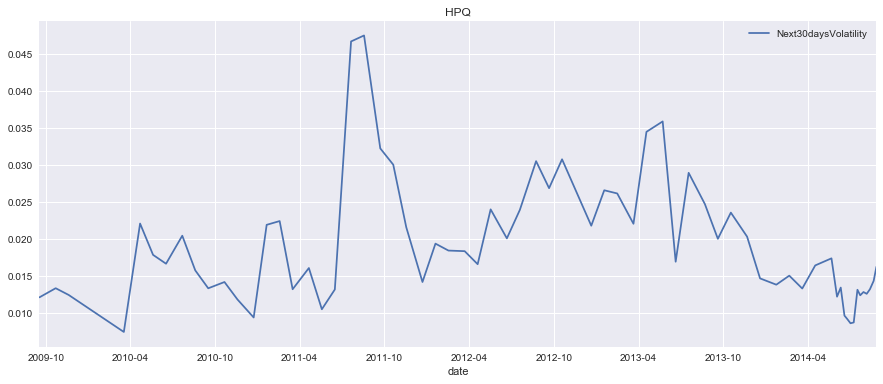

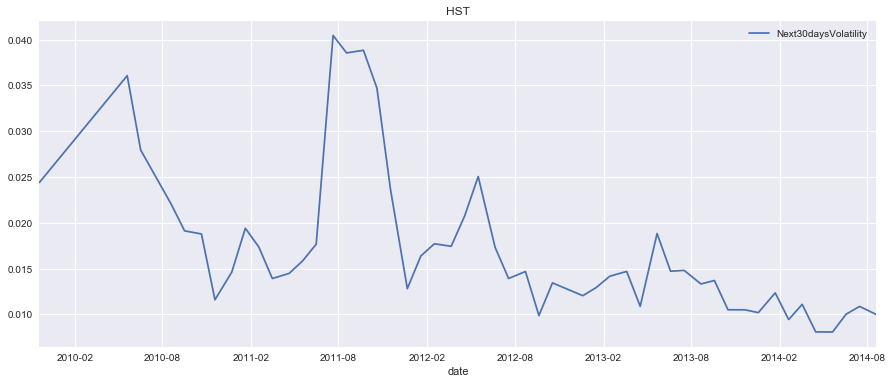

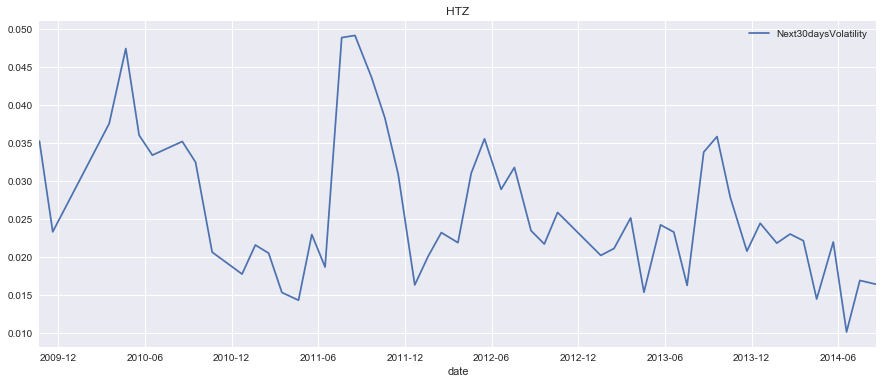

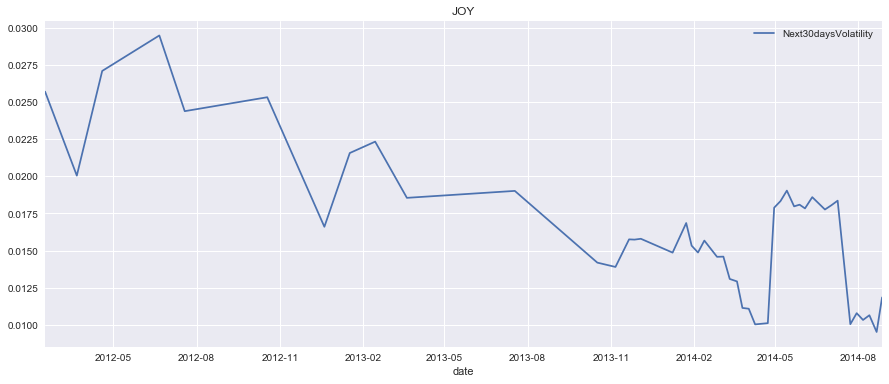

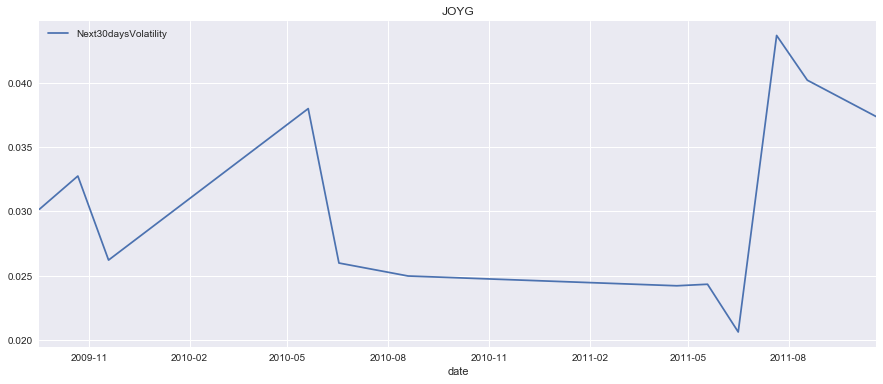

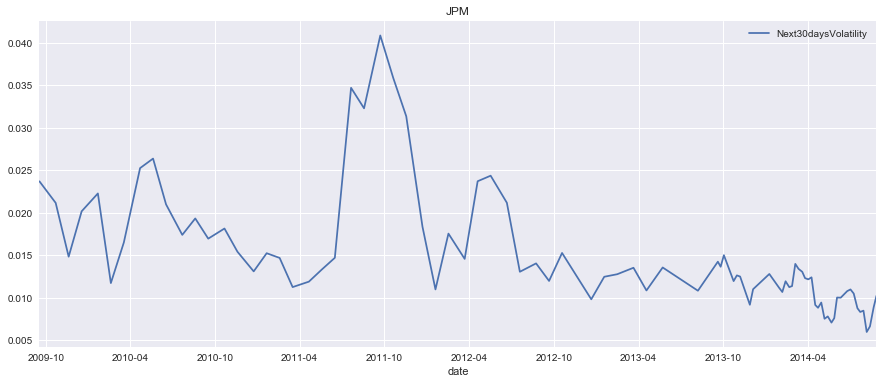

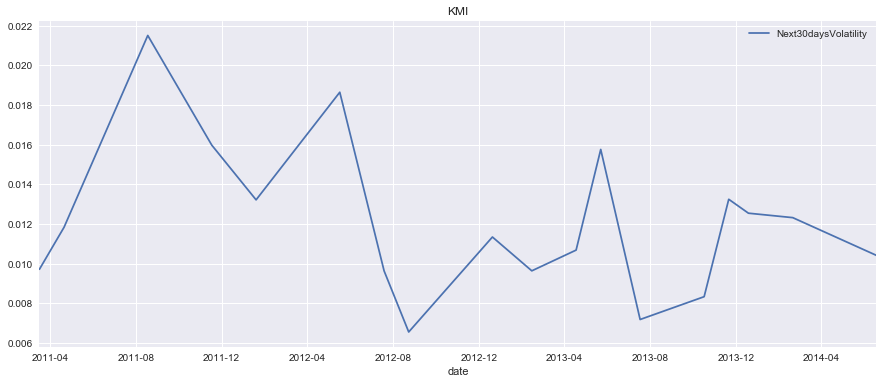

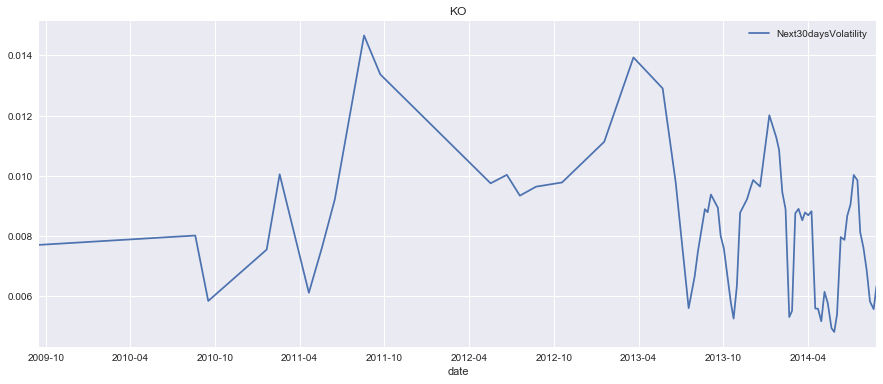

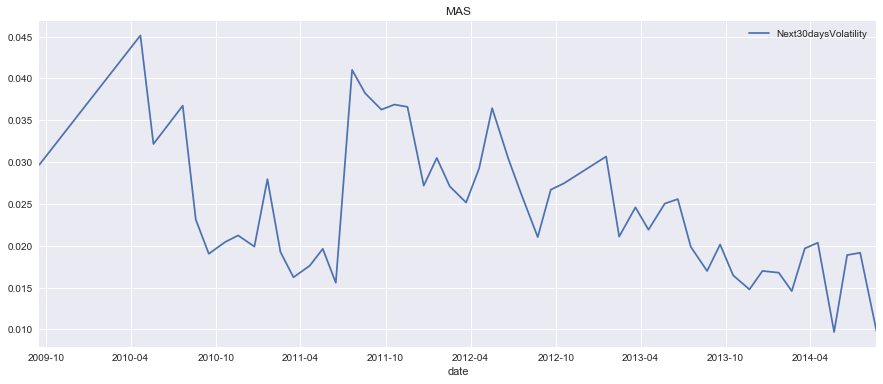

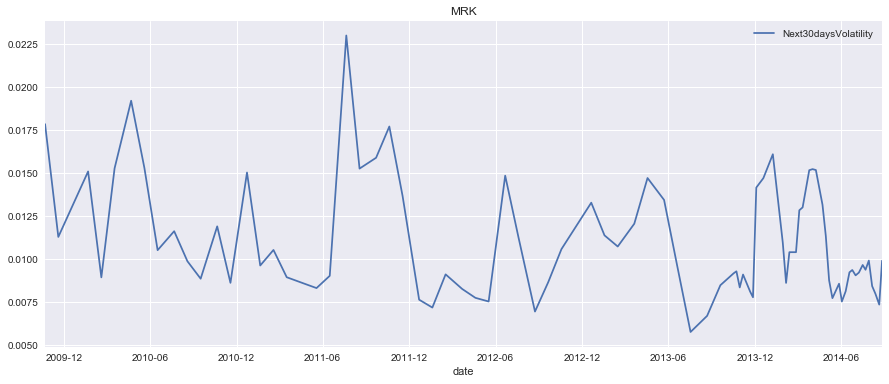

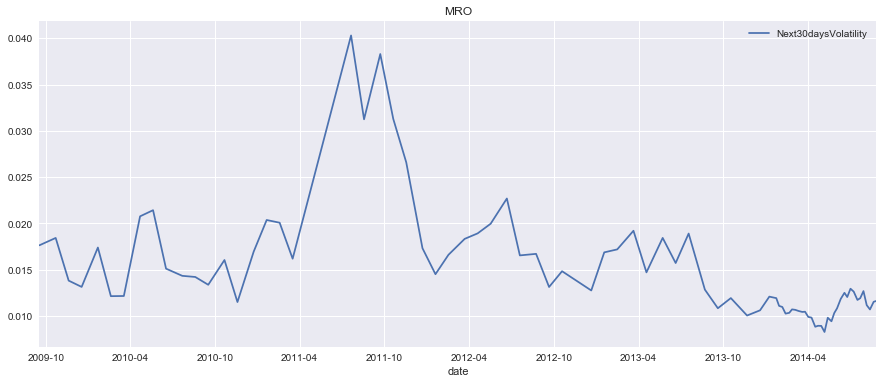

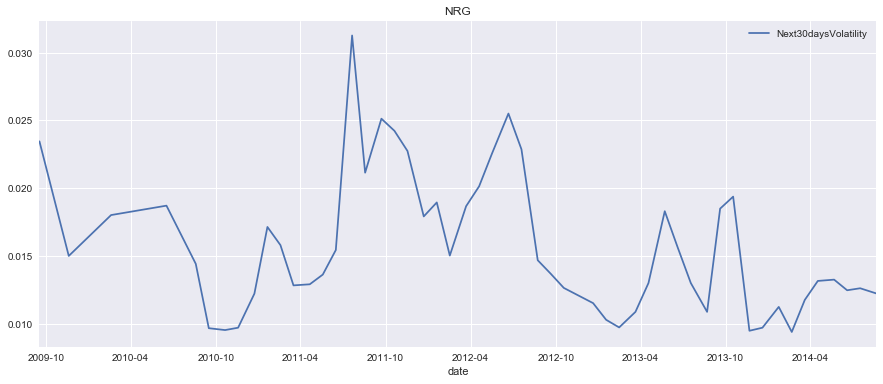

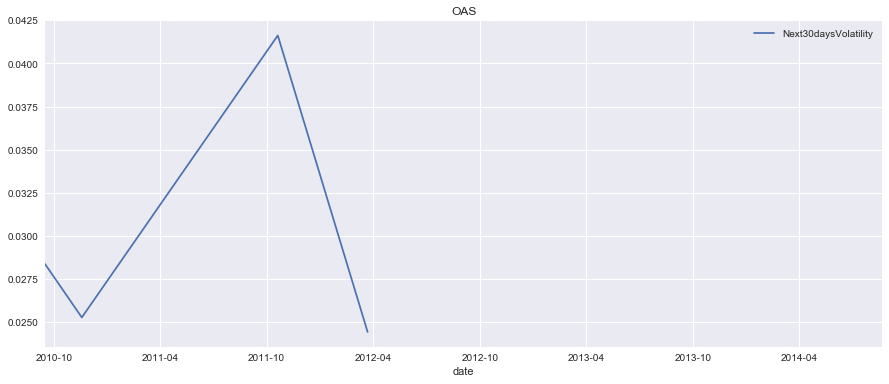

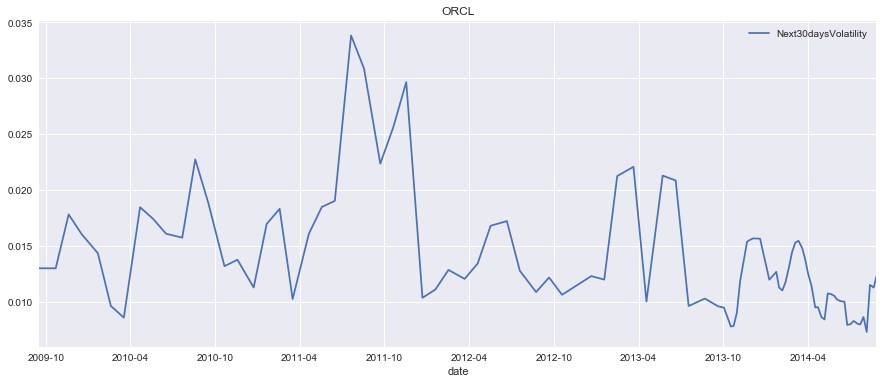

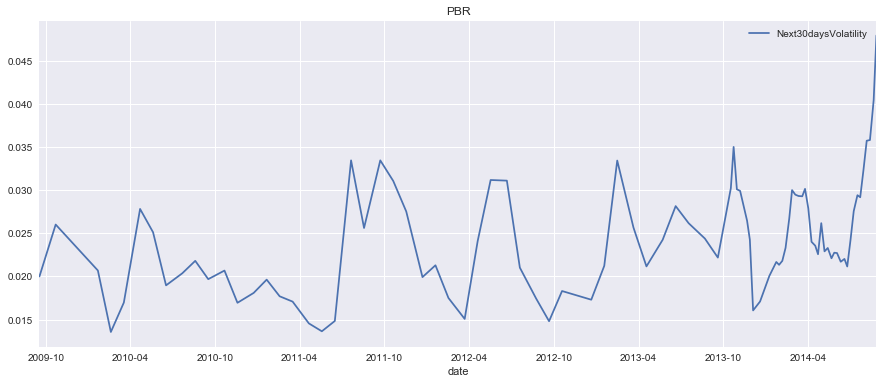

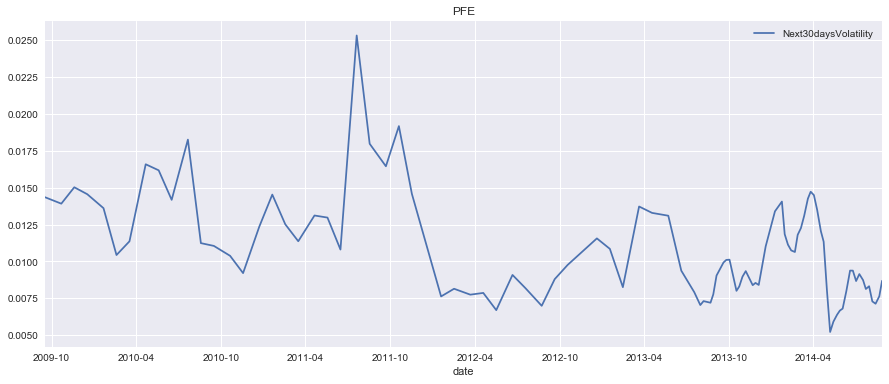

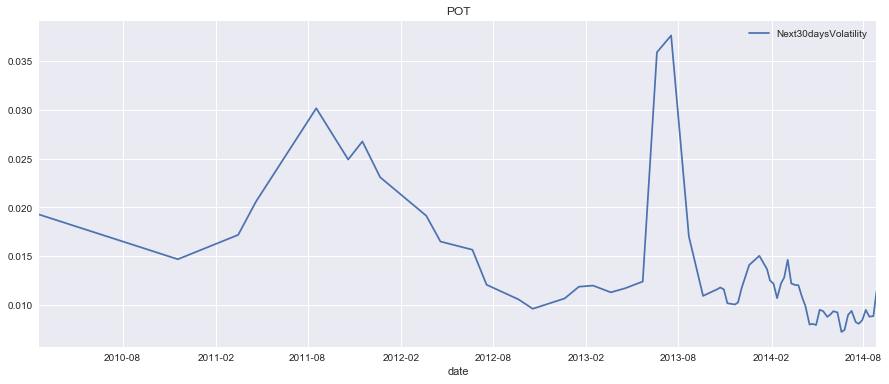

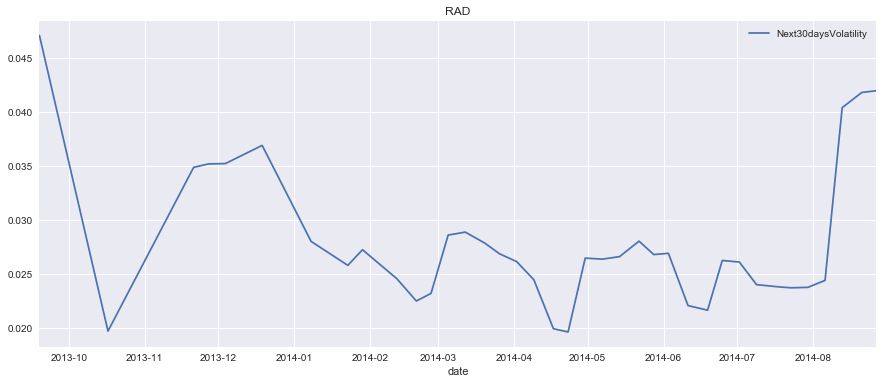

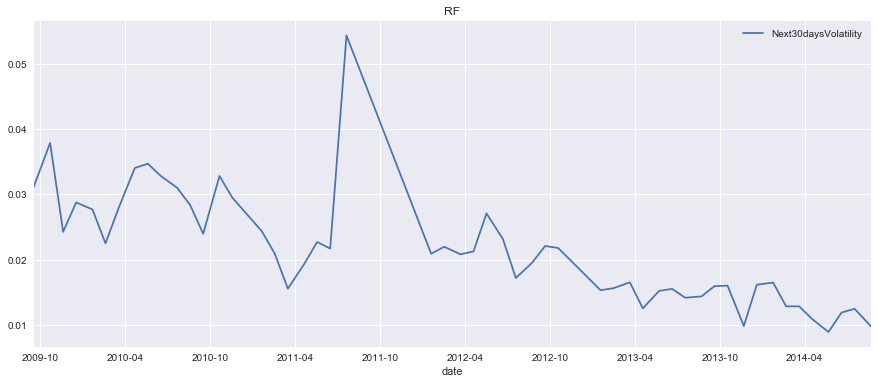

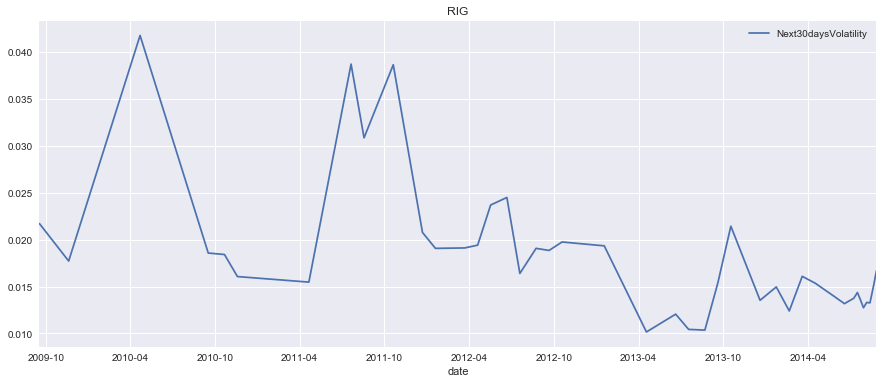

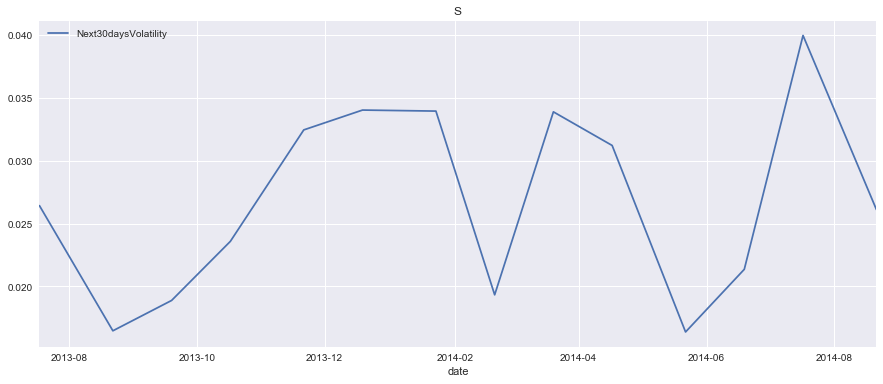

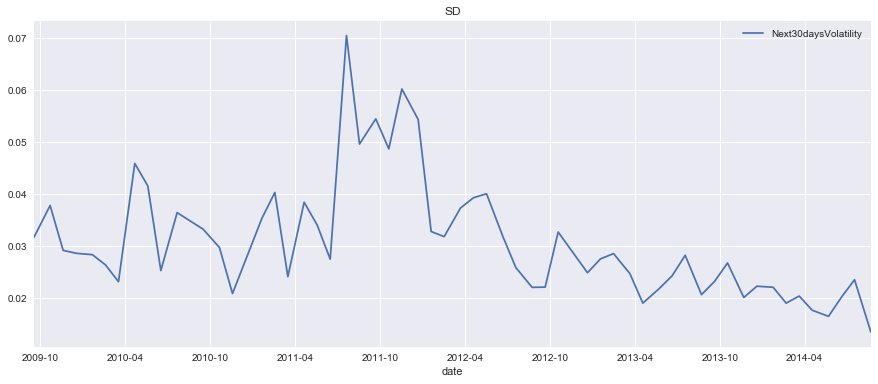

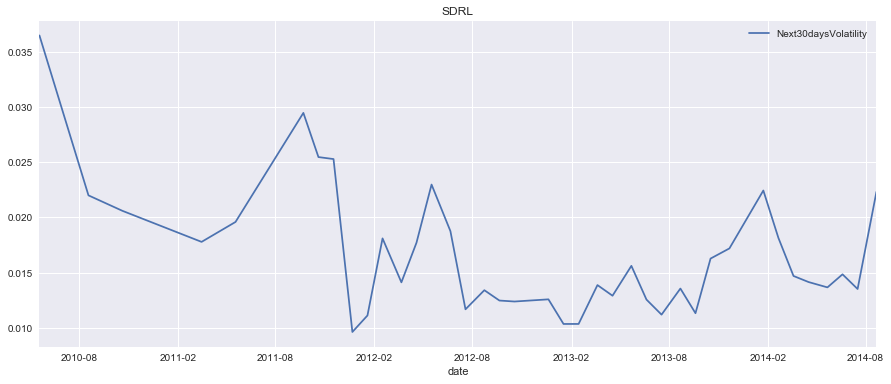

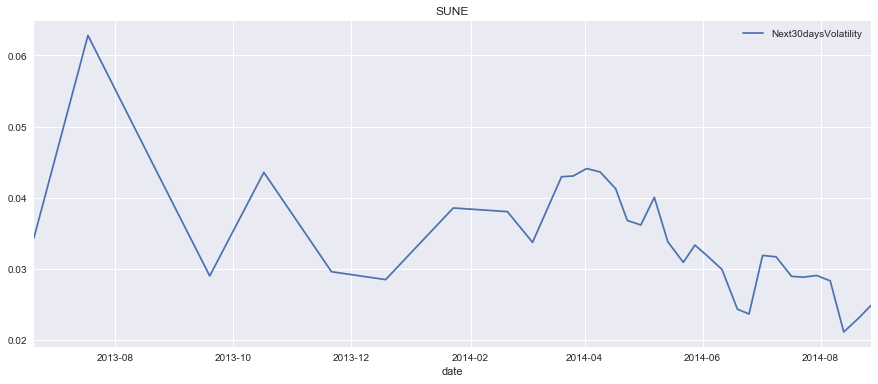

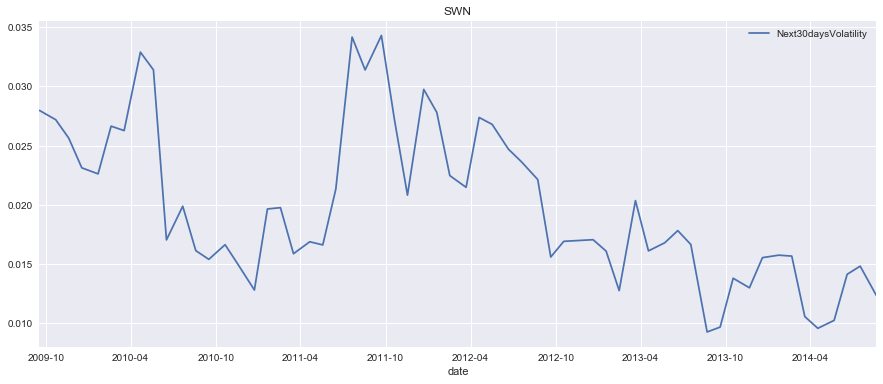

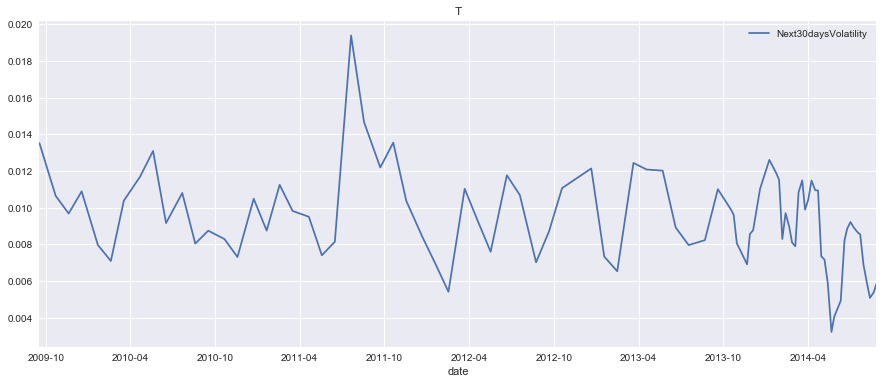

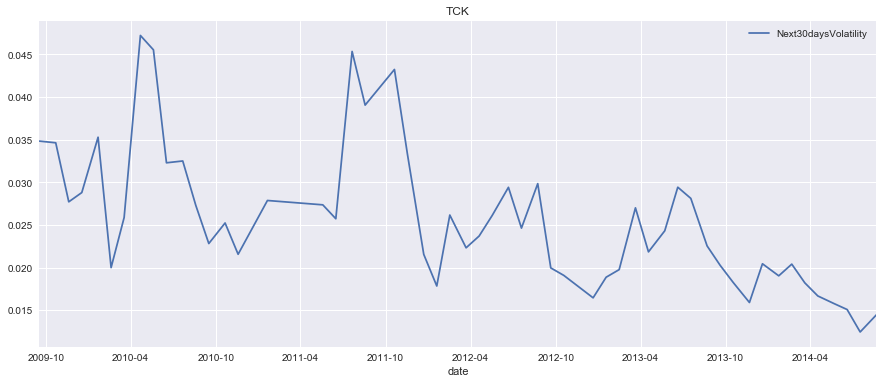

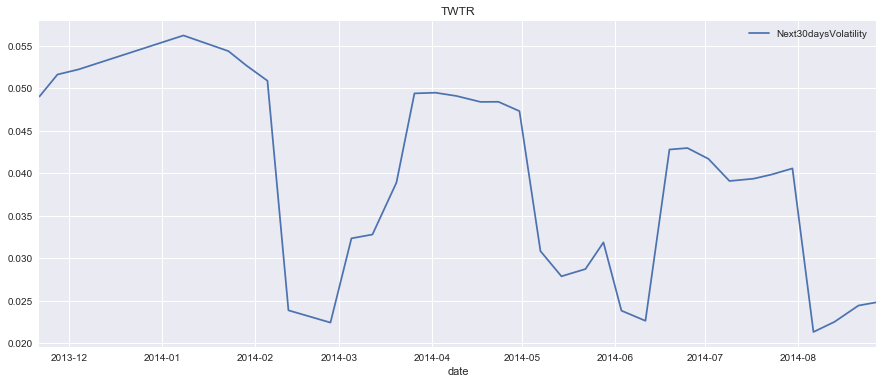

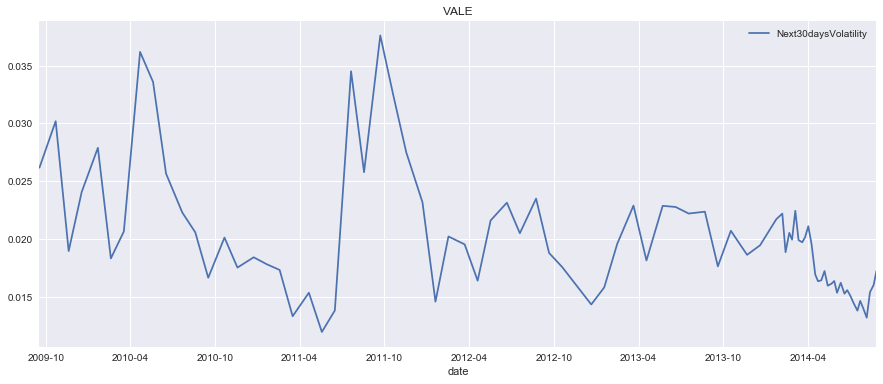

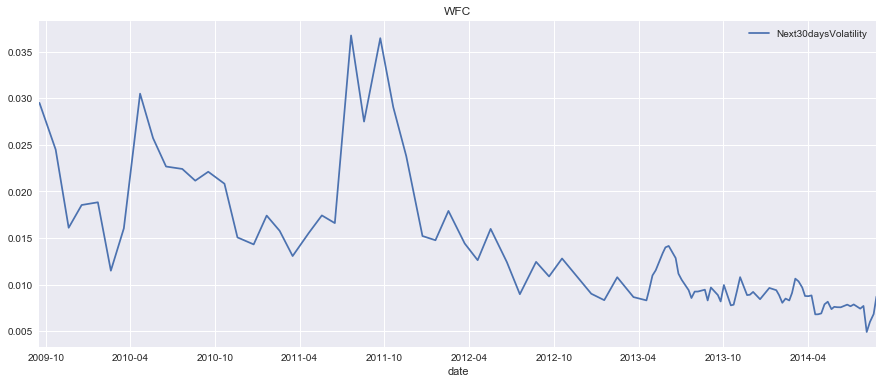

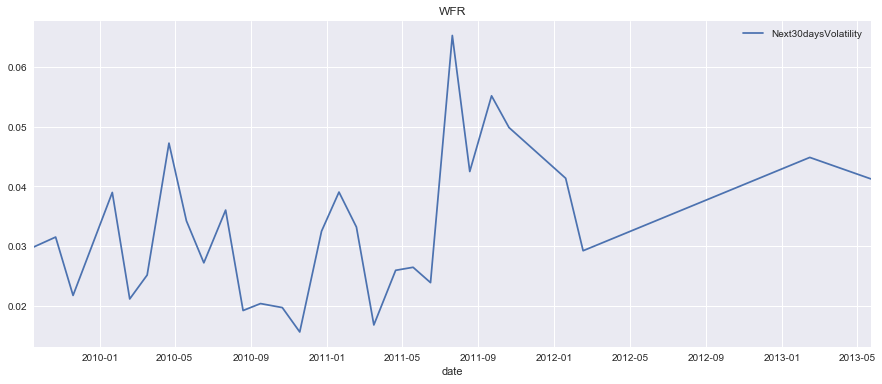

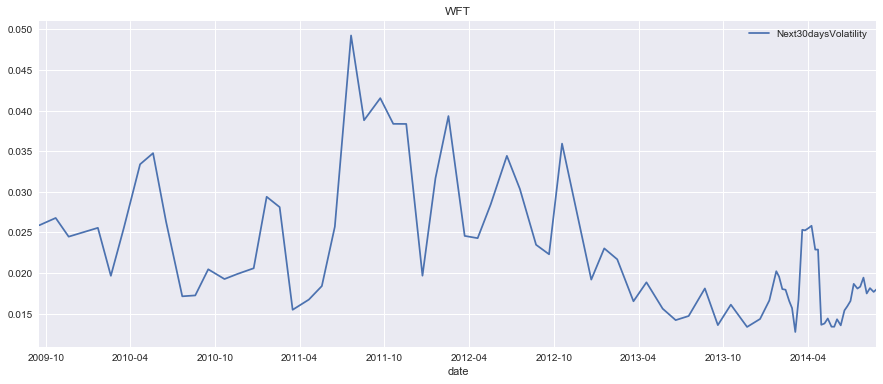

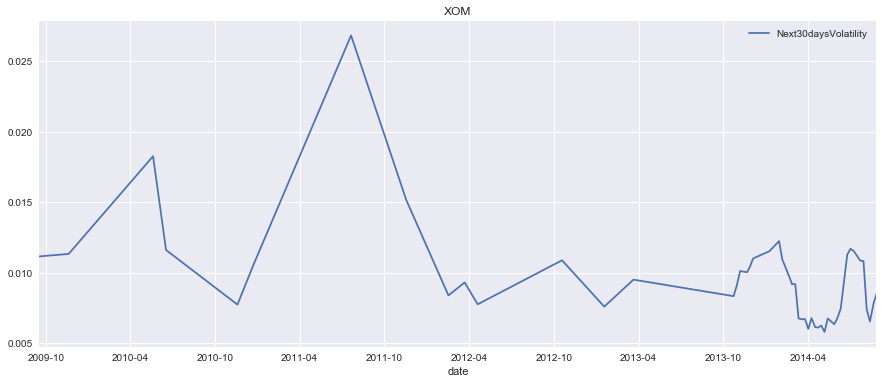

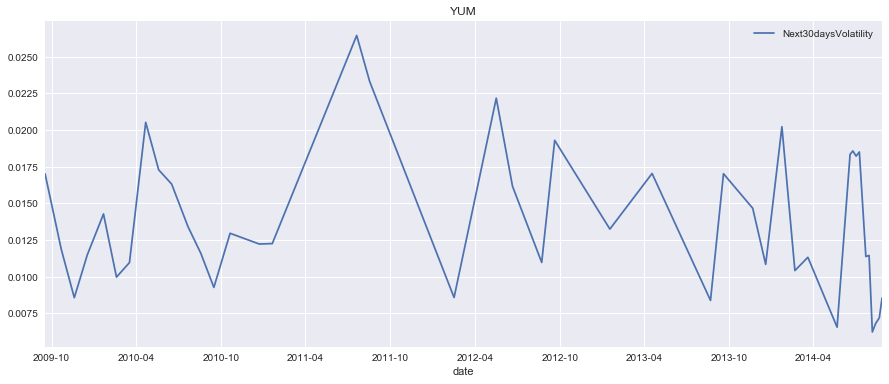

In [8]:
for name,group in data.groupby('ticker'):
    group.plot(x='date', y='Next30daysVolatility', title=name)

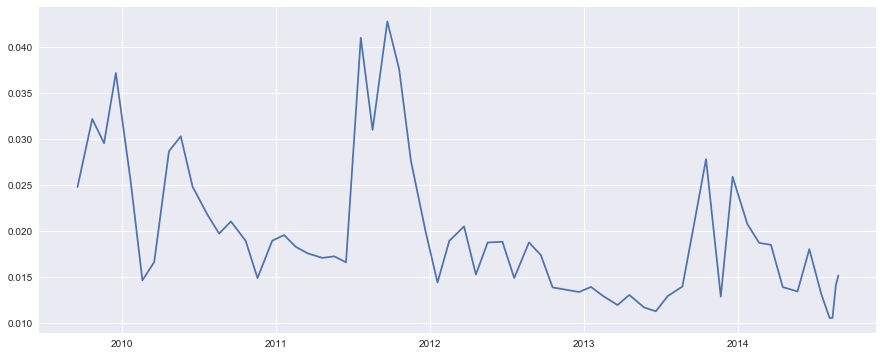

In [15]:
plt.plot(data.Next30daysVolatility[data.ticker=='AA'])
plt.savefig('Time Trend for the underlying stock return volatility.png')

In [69]:
data.index

Index([2009-09-17, 2009-10-22, 2009-11-19, 2009-12-17, 2010-01-21, 2010-02-18,
       2010-03-18, 2010-04-22, 2010-05-20, 2010-06-17,
       ...
       2014-06-19, 2014-06-25, 2014-07-02, 2014-07-09, 2014-07-23, 2014-07-30,
       2014-08-06, 2014-08-13, 2014-08-21, 2014-08-27],
      dtype='object', name='date', length=3131)

In [19]:
data1=pd.read_stata('20151206timeseries.dta')

In [20]:
data1.head(5)

date      y_m ticker  id  changeinimpl_volatility_C  \
0  20091022  Oct2009     AA   1                  -0.250879   
1  20091119  Nov2009     AA   1                   0.108316   
2  20091217  Dec2009     AA   1                   0.026041   
3  20100121  Jan2010     AA   1                  -0.065004   
4  20100218  Feb2010     AA   1                  -0.008323   

   changeinimpl_volatility_P  changeinimpl_volatility_averag  \
0                  -0.244061                       -0.247470   
1                   0.088462                        0.098389   
2                   0.023239                        0.024640   
3                  -0.058198                       -0.061601   
4                  -0.022230                       -0.015277   

   changeinC_open_interest  changeinP_open_interest  \
0                 -17824.0                   1730.0   
1                  -6755.0                  -1123.0   
2                 102140.0                  -1618.0   
3                -111208.0                   4616.0   
4                  12170.0                  -4945.0   

   changeinTotal_open_interest    ...     delta_iv  delta_VIX  delta_total  \
0                     -16094.0    ...    -0.247470   1.939998    -280430.0   
1                      -7878.0    ...     0.098389  -0.949999     195321.0   
2                     100522.0    ...     0.024640  -4.990000      -5574.0   
3                    -106592.0    ...    -0.061601  -2.250000    -602051.0   
4                       7225.0    ...    -0.015277  -4.009998     264641.0   

   delta_total_1 lag_delta_total  lag2delta_total    lag_op    lag_iv  \
0      -280430.0             NaN              NaN       NaN       NaN   
1       195321.0       -280430.0              NaN -280430.0 -0.247470   
2        -5574.0        195321.0        -280430.0  195321.0  0.098389   
3      -602051.0         -5574.0         195321.0   -5574.0  0.024640   
4       264641.0       -602051.0          -5574.0 -602051.0 -0.061601   

    lag_VIX    lag_rv  
0       NaN       NaN  
1  1.939998  0.007409  
2 -0.949999 -0.002631  
3 -4.990000  0.007626  
4 -2.250000 -0.011738  

[5 rows x 26 columns]

F:\anaconda\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


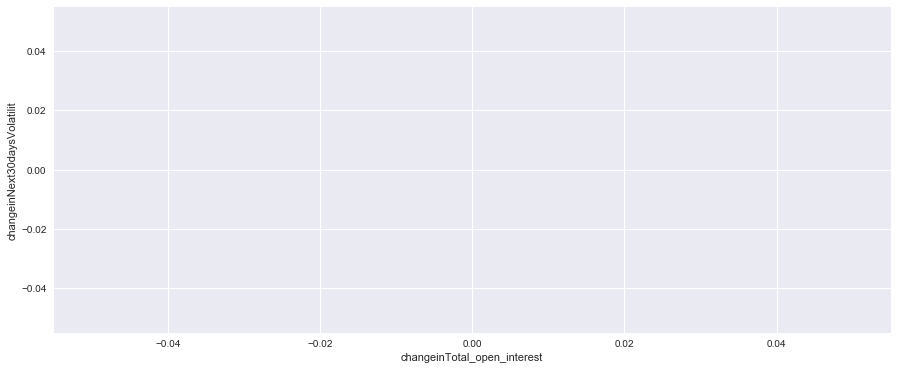

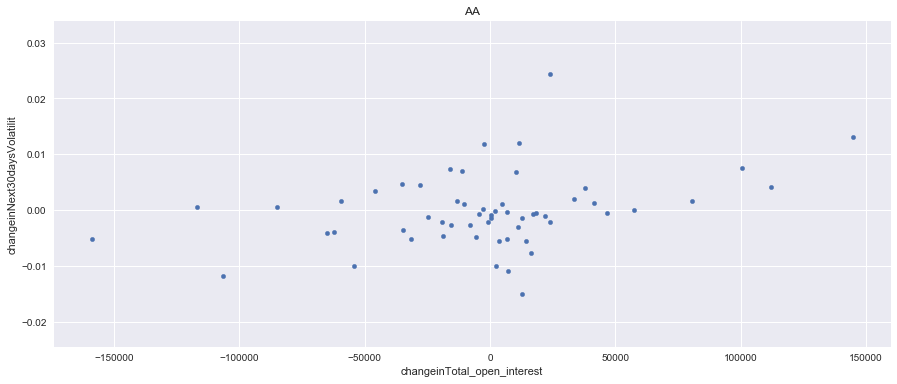

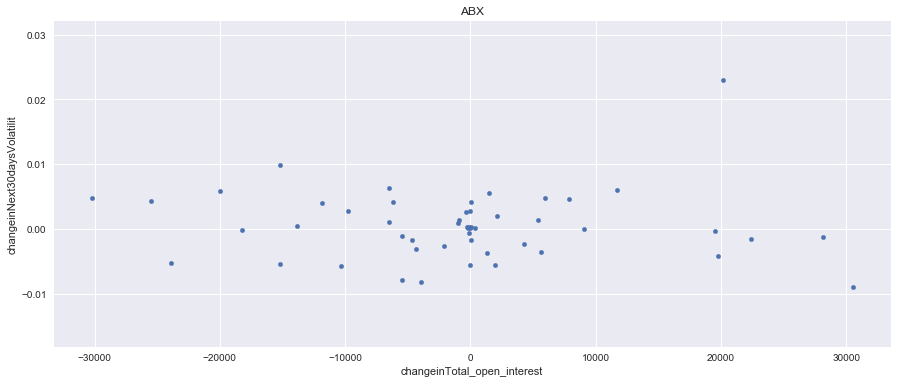

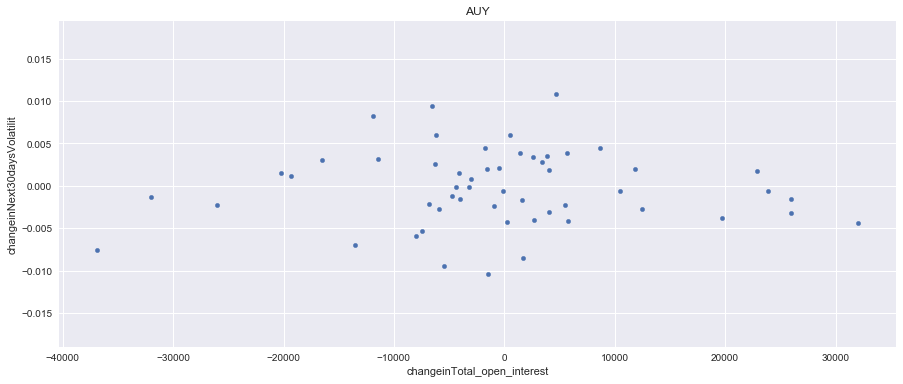

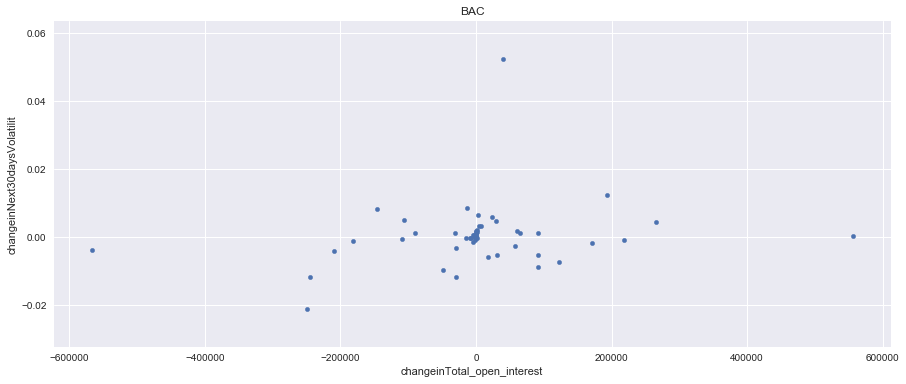

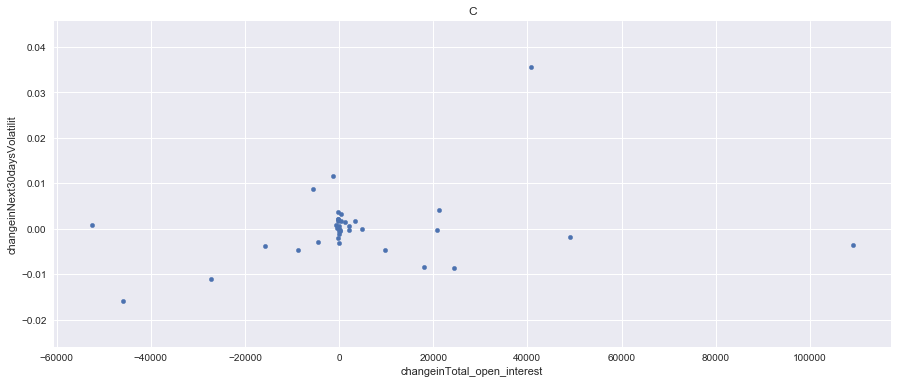

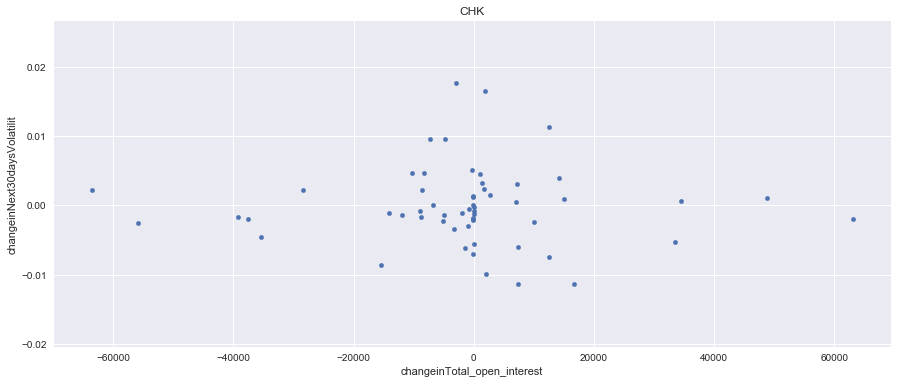

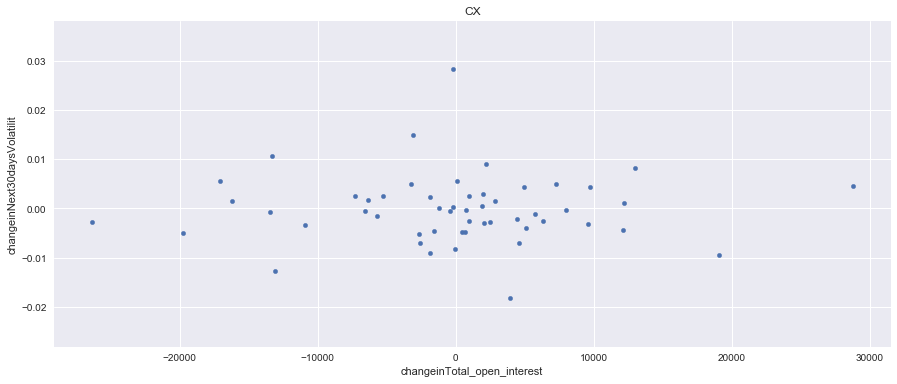

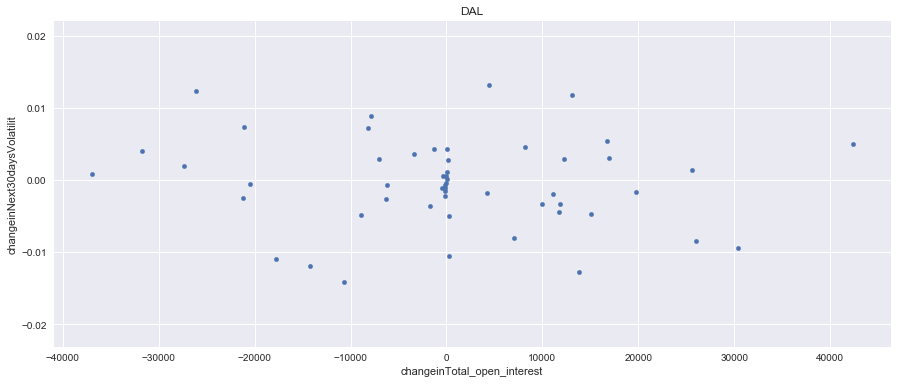

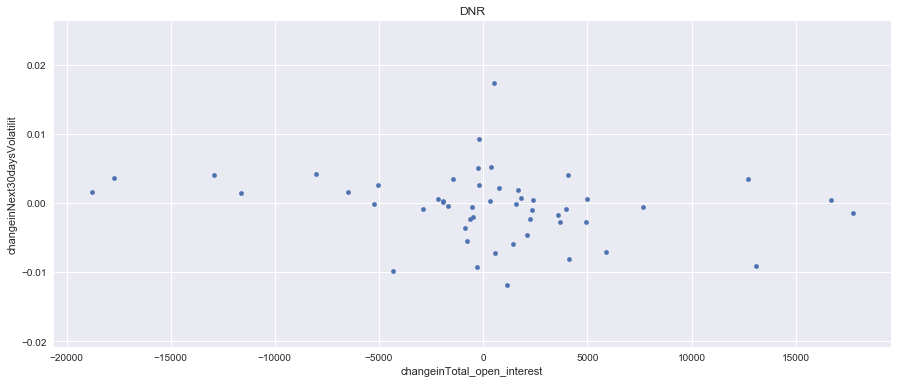

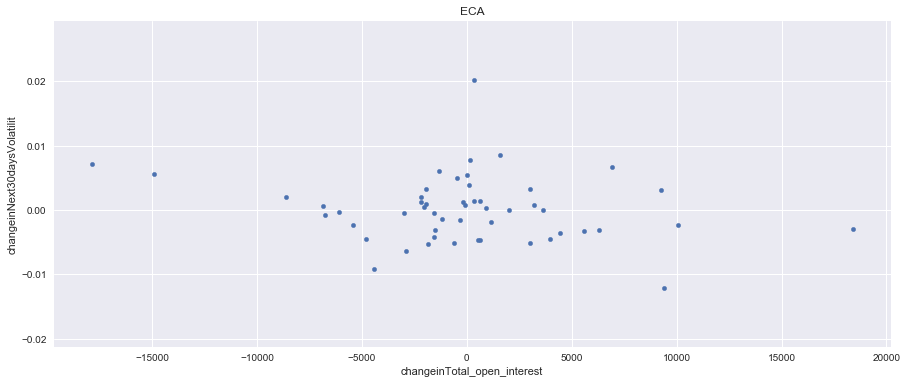

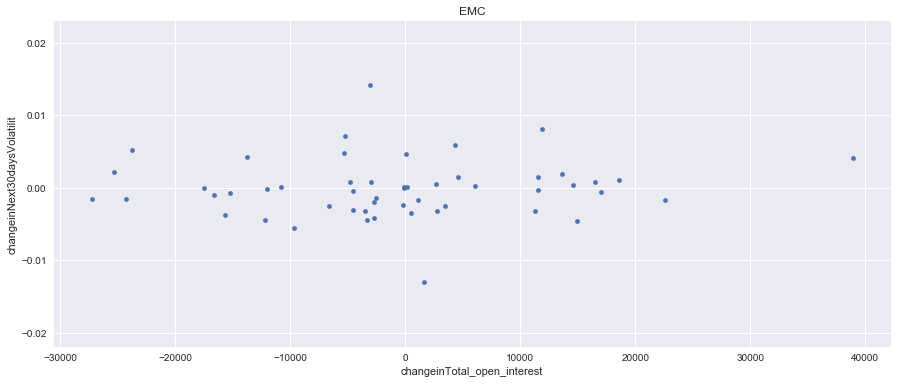

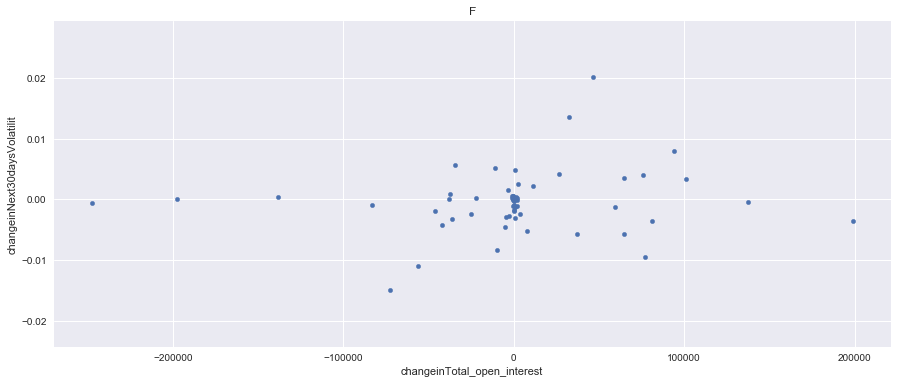

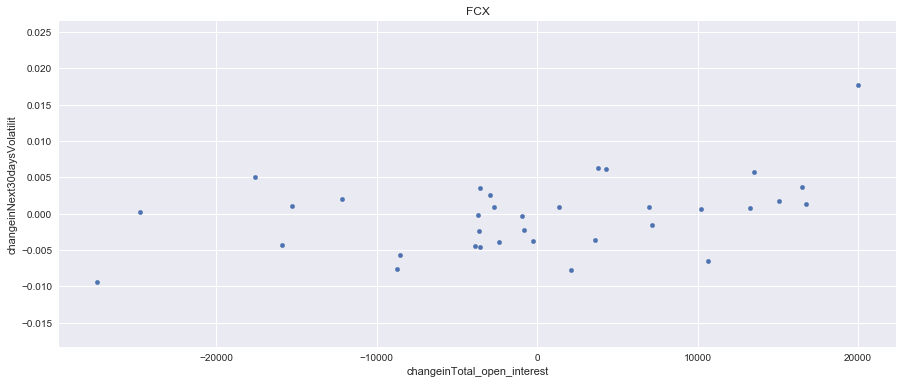

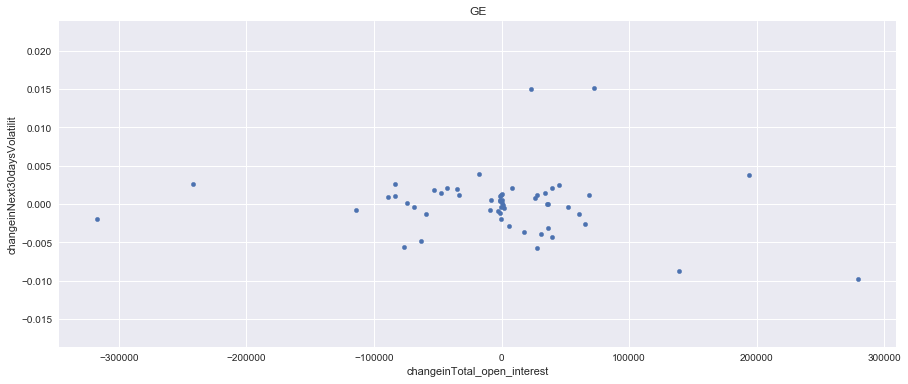

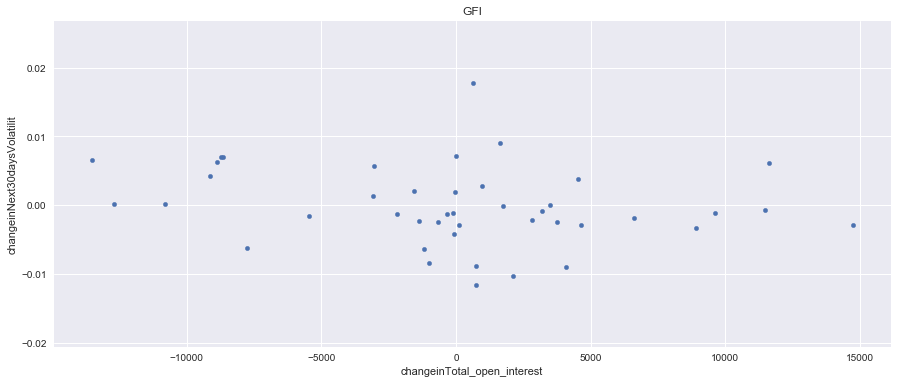

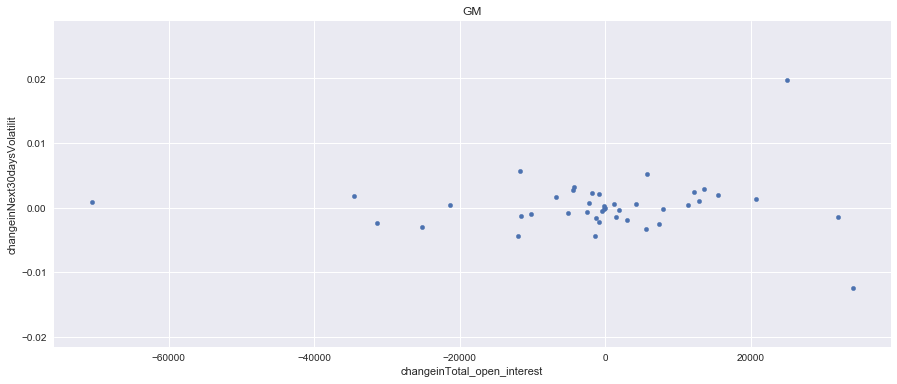

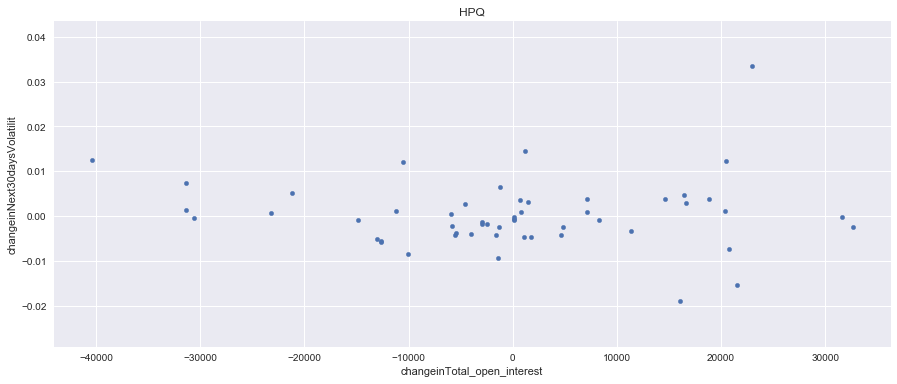

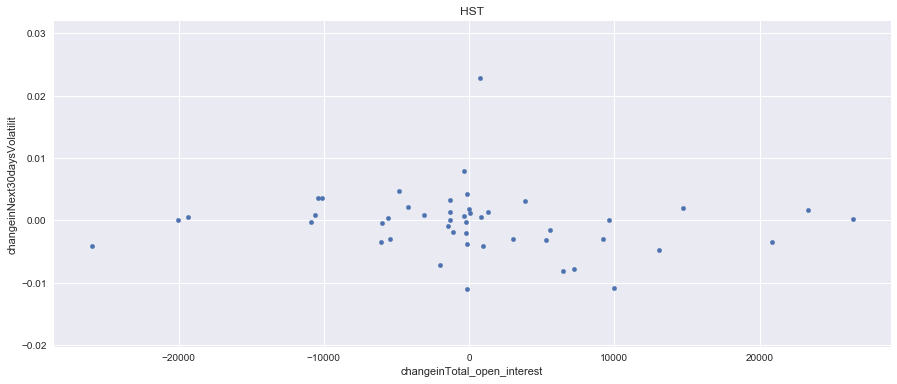

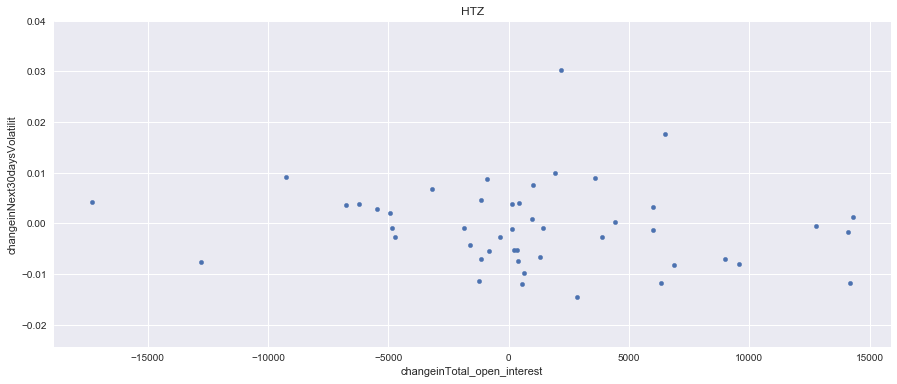

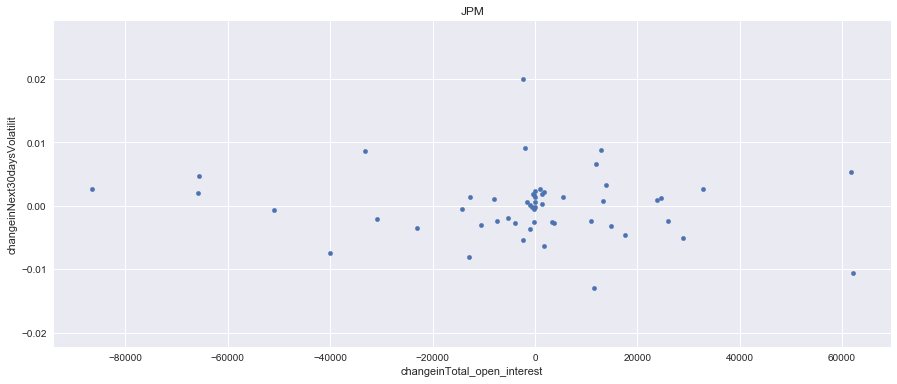

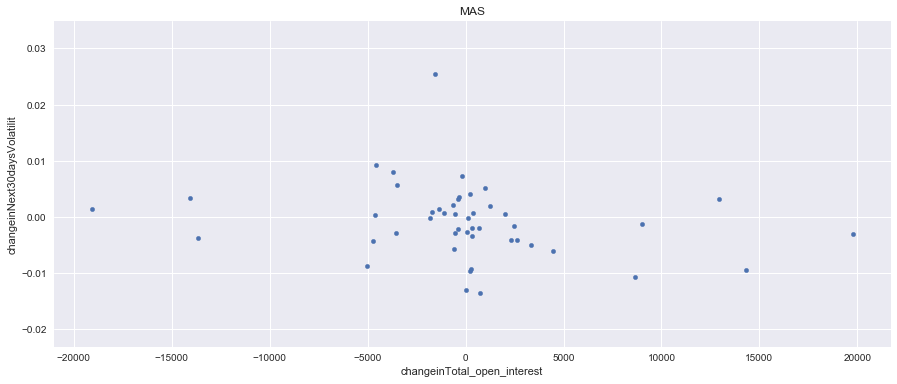

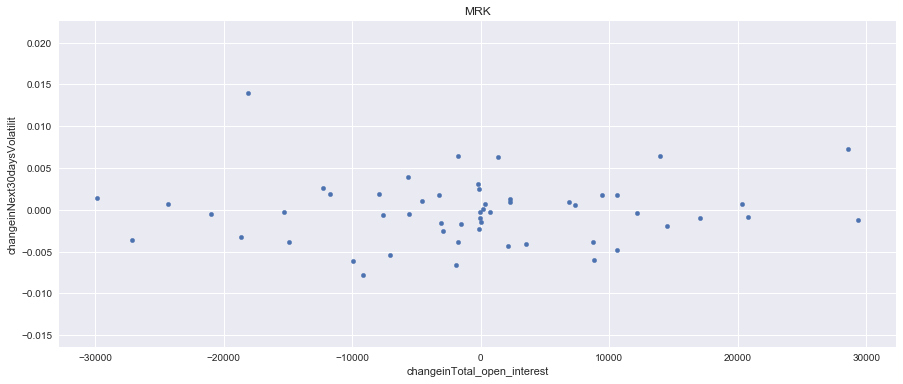

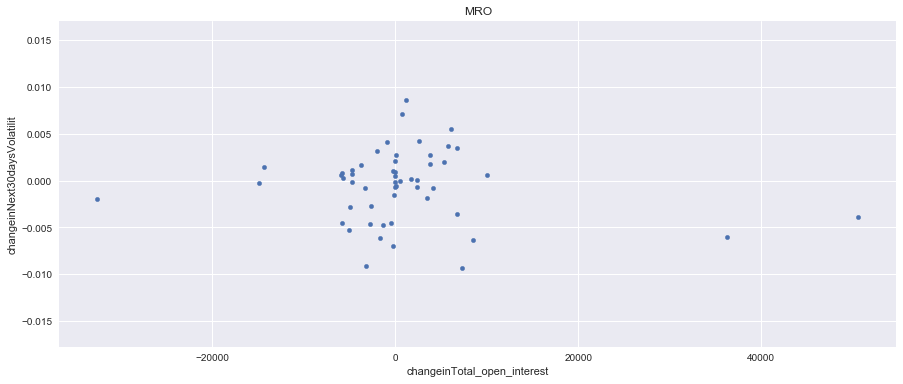

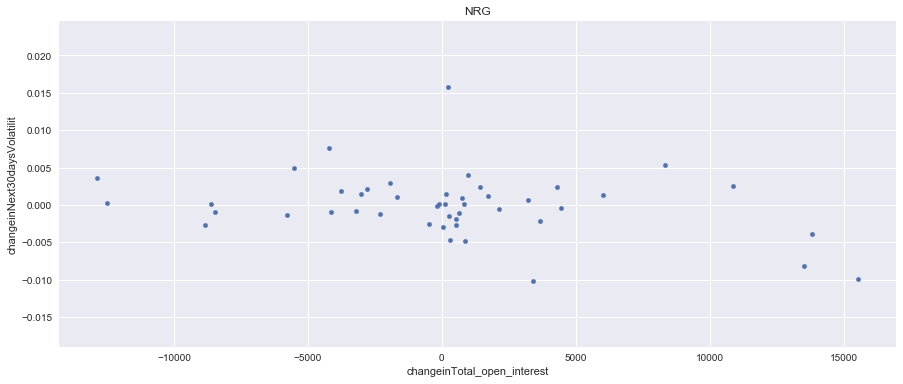

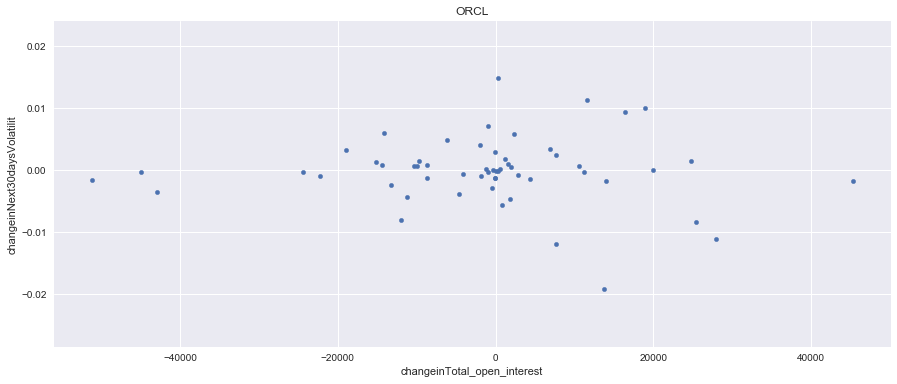

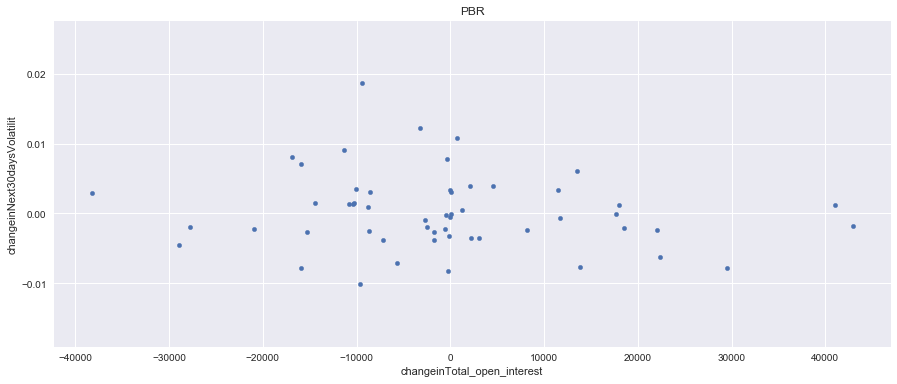

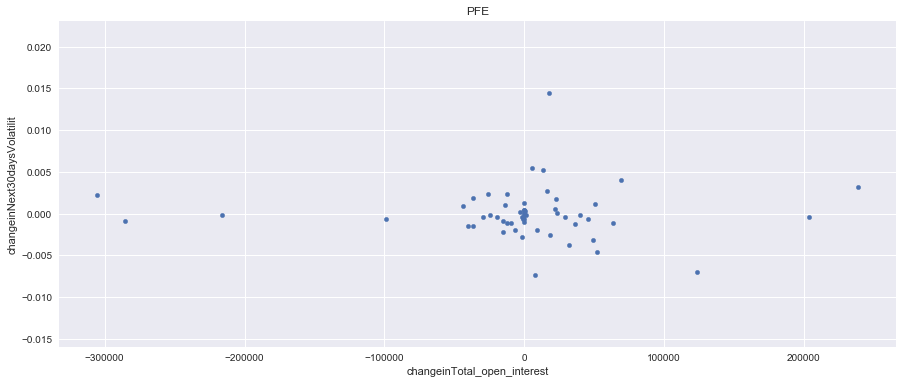

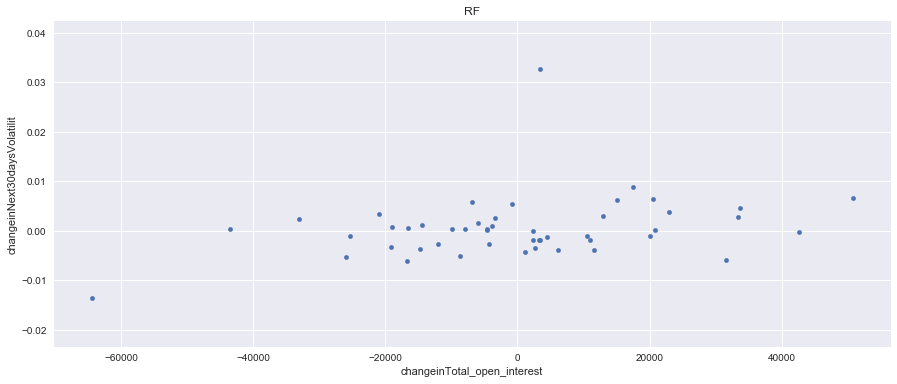

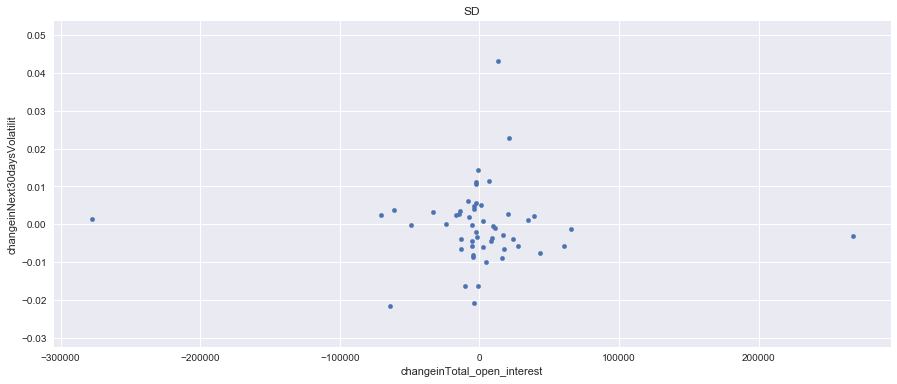

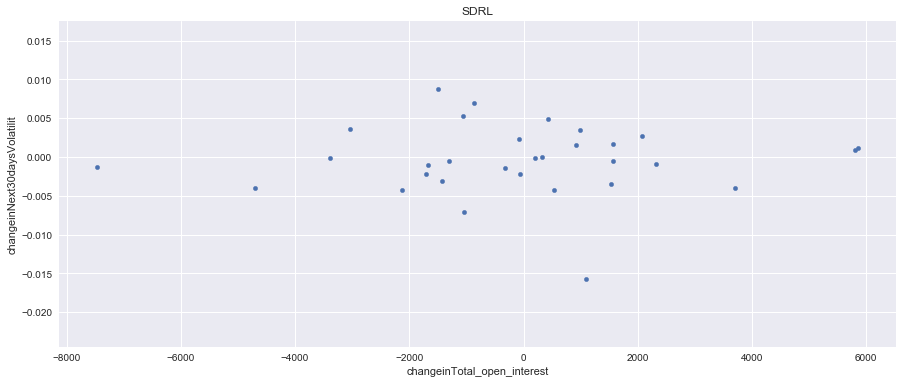

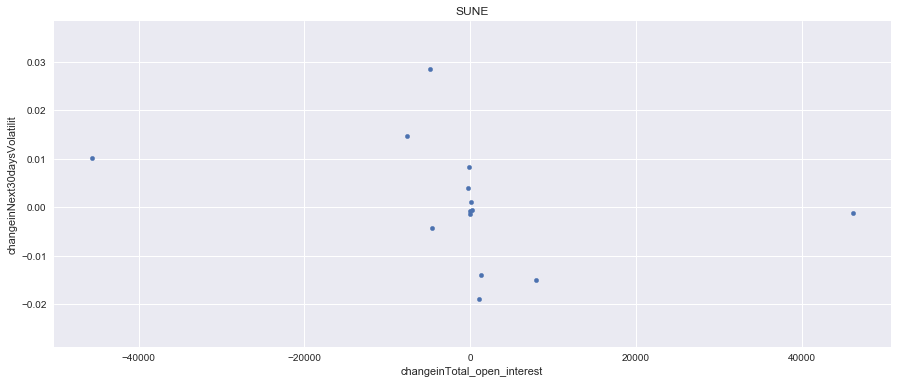

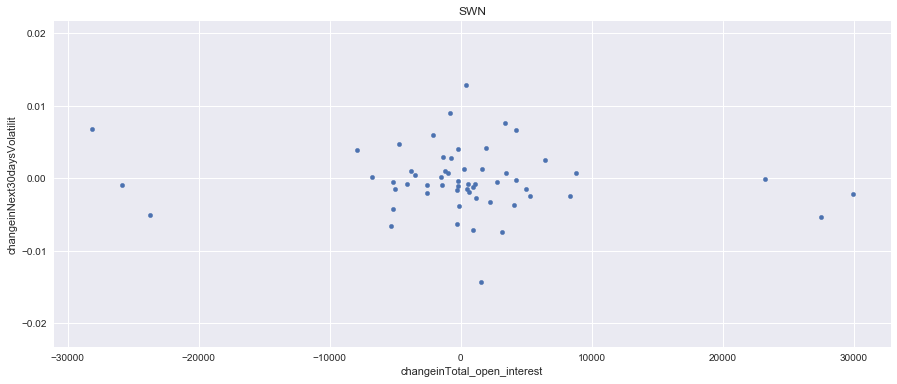

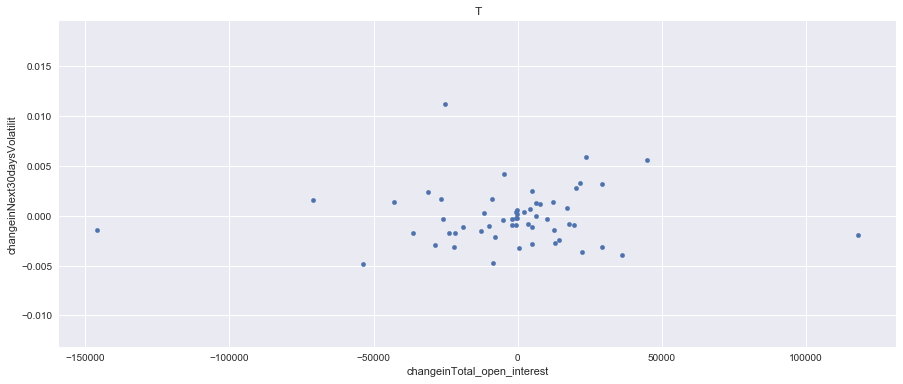

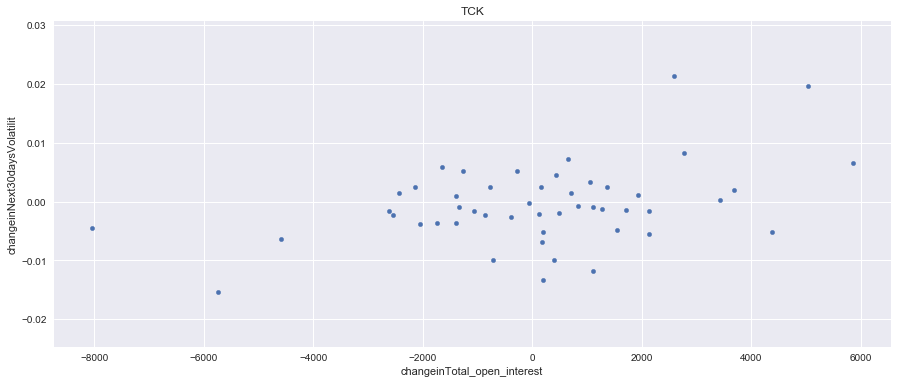

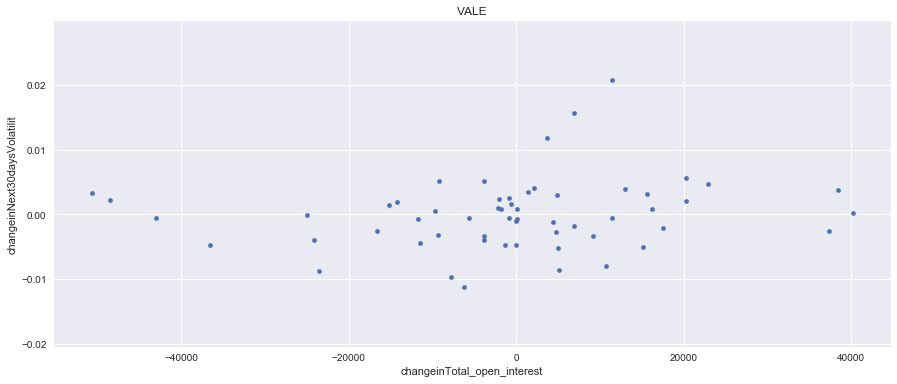

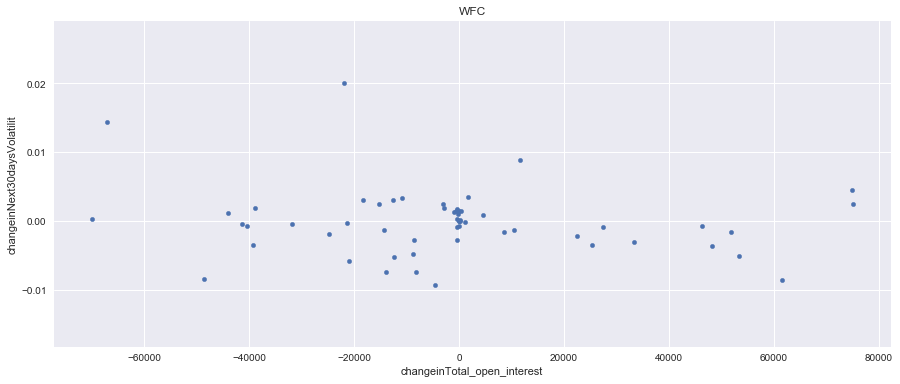

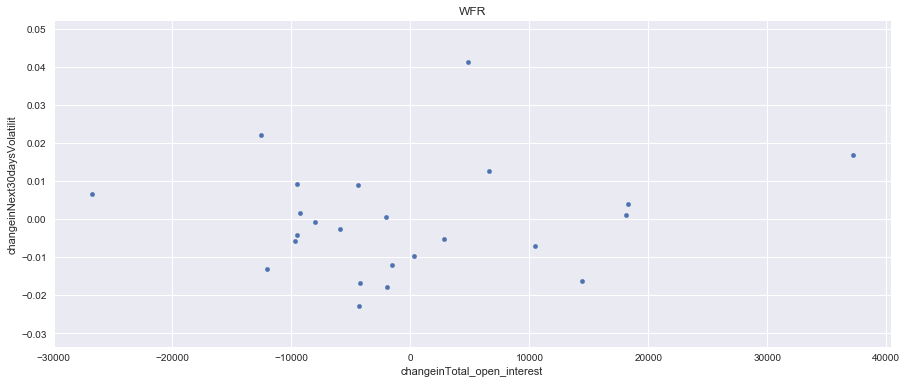

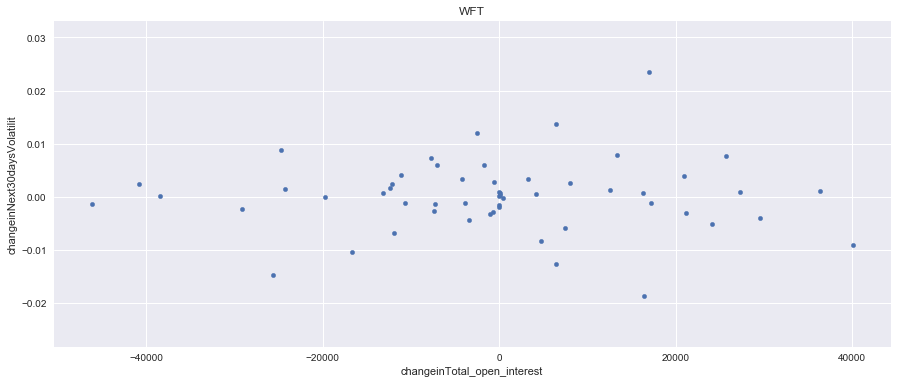

In [24]:
for name,group in data1.groupby('ticker'):
    group.plot.scatter(x='changeinTotal_open_interest', y='changeinNext30daysVolatilit', title=name)


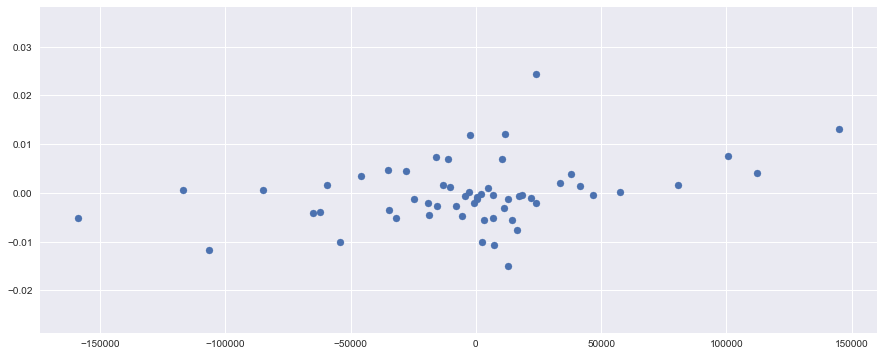

In [26]:
plt.scatter(x=data1.changeinTotal_open_interest[data1.ticker=='AA'],y=data1.changeinNext30daysVolatilit[data1.ticker=='AA'])
plt.savefig('delta_open_Interest_VS_delta_volatility.png')